## Higher Diploma in Science in Computing (Data Analytics): Machine Learning & Statistics 

***

<div align="center"><h3> Boston House Prices Dataset (Assessment)</h3></div> 
    

    

<img src="https://i.ibb.co/ySfSKpz/boston-house-pic.jpg" alt="boston-house-pic" border="0">

***


<img src="https://image.ibb.co/gw4Gen/Index-GMIT.png" alt="Index-GMIT" border="0">


<div align="center"><h3> Gareth Duffy - g00364693 </h3></div> 

***
<div align="center"><b>Start date: 29th September 2019 - End date: 12th December 2019</div>
    
***

***
### Project objectives
***

This assessment concerns the well-known Boston House Prices dataset and the
Python packages scipy, keras, and jupyter.

- **Describe** (Descriptive statistics and plots to describe the Boston House Prices dataset). *Good summary of the dataset, repository well laid-out
and organised. Reasonable commits to the repository*. **20%**

- **Infer** (Add a section where you use inferential statistics to analyse whether there is a significant difference in median house prices between houses that are along the Charles river and those that aren’t. Explain and discuss your findings within the notebook). *Appropriate analysis of the relationship between the median house price and whether the house borders the
river, with good explanations of the analysis.* **20%**

- **Predict** (use keras to create a neural network that can predict the median house price based on the other variables in the dataset. You are free to interpret this as you wish — for example, you may use all the other variables, or select a subset). *Well-trained neural network providing decent predictions
of house prices based on the other variables. Good explanations of how to use the neural network and how it works.* **60%**

***
### Software & dependencies
***

- Hardware used:

HP Pavilion Notebook; Microsoft Windows 10 Home; Processor:Intel(R) Core(TM) i3-5157U CPU @ 2.50GHz, 2494 Mhz, 2 Core(s), 4 Logical Processor(s); RAM: 8GB.

- Software used:

Jupyter Notebook version 5.5.0; Visual Studio Code version 1.37.1; Anaconda version 5.2.0; Python version 3.7.5

- Coding methodology:

All coding and experimentation practices for analysis were implemented entirely with Python with it's associated modules and libraries via the full Anaconda distribution.

***
### Introduction & background research 
***

The Boston housing dataset contains information collected by the US Census Service concerning houses in various areas around the city of Boston, Massachusetts. Each sample corresponds to a unique area and has around a dozen measures. The data was first published in 1978 and is relatively small, i.e. it contains just over 500 examples. The dataset has been used extensively throughout the literature, and notably so on benchmark algorithms. The data was originally published by David Harrison and Daniel Rubinfeld in 1978 with the surprisingly interesting journal title of "Hedonic prices and the demand for clean air" [5].

**How much would you pay for clean air?**

Their paper investigates the methodological problems associated with the use of the housing market to measure the *willingness* to pay for "clean air". By using a "hedonic" housing price model alongside data for the Boston metropolitan area, the authors offer quantitative estimates of the willingness to pay for air quality improvements. Essentially, the authors held the presumtion that individuals will pay more for a house located in an area with good air quality compared to an otherwise identical unit in an area with poor air quality. Their paper investigates the methodological problems associated with the housing market approach because it contained a large number of neighbourhood variables (necessary to isolate the *independent* influence of air pollution) and more reliable air pollution data. They also develop and propose a 4-step procedural model as the basis of their empical investigations. Their paper is an impressive, mathematically-laden piece of research, offering for example, a number of scientifically derived equations which result in seemingly strong and reliable correlation values pertaining to "willingness to pay for clean air" [5]. 

<img src="https://i.ibb.co/J5w2F1q/boston-overhead.jpg" alt="boston-overhead" border="0">

While the primary focus of the originval study was air quality, the dataset actually has two target attributes: NOX, in which the nitrous oxide level is to be predicted; and MEDV, in which the median value of a home is to be predicted. Interestingly, variable 14 (MEDV) appears to be "censored" i.e. capped at 50.00 (corresponding to median price of 50,000 dollars). This fact is suggested by the fact that the highest median price of exactly 50,000 is reported in 16 cases, while 15 cases have prices between 40,000 and 50,000, with prices rounded to the nearest hundred [4]. Let's explore some more.

***
### Overview of the dataset
***

Let's begin our exploration of the dataset by examining each variable, i.e. column.

**CRIM** - per capita crime rate by town

**ZN** - proportion of residential land zoned for lots over 25,000 sq.ft.

**INDUS** - proportion of non-retail business acres per town.

**CHAS** - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

**NOX** - nitric oxides concentration (parts per 10 million)

**RM** - average number of rooms per dwelling

**AGE** - proportion of owner-occupied units built prior to 1940

**DIS** - weighted distances to five Boston employment centres

**RAD** - index of accessibility to radial highways

**TAX** - full-value property-tax rate per $10,000

**PTRATIO** - pupil-teacher ratio by town

**B** - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

**LSTAT** - % lower status of the population

**MEDV** - Median value of owner-occupied homes in $1000's

***The 14 variables were originally compartmentalized into 5 different categories as follows: [5]***

- Dependent: MEDV

- Structural: RM, AGE

- Neighbourhood: B, LSTAT, CRIM, ZN, INDUS, TAX, PTRATIO, CHAS

- Accessibility: DIS, RAD

- Air Pollution: NOX, PART*

*PART is omitted from the dataset for reasons (say why): NOX is primarily an automobile pollutant and PART is a stationary source pollutant. 

*** 
### Exploration of the Boston dataset part 1: Descriptive summary statistics
***

It's a good idead to check the versions of the prerequisite libraries before we import the Boston dataset.

In [1]:
# Check the versions of the libraries: 

# Python 
import sys # provides access to variables used or maintained by the interpreter and to functions that interact with the interpreter.
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))
# seaborn
import seaborn 
print('seaborn: {}'.format(seaborn.__version__))
# tensorflow
import tensorflow
print('tensorflow: {}'.format(tensorflow.__version__))
# keras
import keras
print('keras: {}'.format(keras.__version__))

Python: 3.7.5 (default, Oct 31 2019, 15:18:51) [MSC v.1916 64 bit (AMD64)]
scipy: 1.3.1
numpy: 1.17.3
matplotlib: 3.1.1
pandas: 0.25.3
sklearn: 0.21.3
seaborn: 0.9.0
tensorflow: 1.15.0


Using TensorFlow backend.


keras: 2.2.4


All our prerequisites libraries are sufficiently up-to-date.

In [2]:
# Import the requisite libraries in initialled form for ease of use:

import numpy as np
import scipy
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns
import sklearn

# Pretty display for notebooks:
%matplotlib inline

# Import the Boston dataset:
from sklearn.datasets import load_boston # [1]
boston_dataset = load_boston()

# Output the dataset keys:
boston_dataset.keys()

# Assign the dataset to the object "Boston"
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)

In [3]:
print("The Boston housing dataset has {} data points with {} variables each.".format(*boston.shape)) # [11]

The Boston housing dataset has 506 data points with 13 variables each.


So there are 13 variables in the dataset, but the target variable i.e. house price (MEDV) is "latent" in the dataset. It is kept in the target dataset *key*. Dataset keys provide us with a number of exploratory features of the dataset, and afford a more informative glimpse of the data itself.  

**Dataset keys**:

- data: contains the information for various houses
- target: prices of the house
- feature_names: names of the features
- DESCR: describes the dataset

Let's eyeball the dataset.

In [3]:
# Output the dataset:

boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


Even by just glancing at the dataset, we get the impression this is an interesting mixed bag of variables packed with many patterns and statistical nuggets hidden behind the values. So let's unpack the dataset a bit more. For example, we can call any of the keys such as the target variable (MEDV).

In [4]:
# House price target variable MEDV (in $1000's):

boston_dataset.target 

# Other keys:

# boston_dataset.feature_names
# boston_dataset.data
# boston_dataset.DESCR

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

Interesting, next we'll check for missing data, this is a prudent step beforw considering any inferential testing methods later on. For example, if some of our predictor variables had missing values, it could affect the quality or accuracy of a model we try to build.

In [4]:
# Count all NaN values:

boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

Great, no missing values here, now let's describe the dataset.

In [5]:
# Describe the basic summary statistics:

boston.describe(include='all').round(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000
mean,3.614,11.364,11.137,0.069,0.555,6.285,68.575,3.795,9.549,408.237,18.456,356.674,12.653
std,8.602,23.322,6.860,0.254,0.116,0.703,28.149,2.106,8.707,168.537,2.165,91.295,7.141
min,0.006,0.000,0.460,0.000,0.385,3.561,2.900,1.130,1.000,187.000,12.600,0.320,1.730
25%,0.082,0.000,5.190,0.000,0.449,5.886,45.025,2.100,4.000,279.000,17.400,375.378,6.950
50%,0.257,0.000,9.690,0.000,0.538,6.208,77.500,3.207,5.000,330.000,19.050,391.440,11.360
75%,3.677,12.500,18.100,0.000,0.624,6.624,94.075,5.188,24.000,666.000,20.200,396.225,16.955
max,88.976,100.000,27.740,1.000,0.871,8.780,100.000,12.126,24.000,711.000,22.000,396.900,37.970


Where is the median house price? It's stored as the target key and we need to add it to the dataframe now. 

In [6]:
# Give the MEDV target variable a new name and add it to the dataframe:

boston['PRICE'] = boston_dataset.target # "MEDV" is now "PRICE"

# Eyeball the dataset with added PRICE variable:

boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Great, but unlike the feature variables, we haven't yet calculated any descriptive stats from the target variable, so let's do that now.

In [39]:
# [11]
import math 

prices = boston['PRICE']

# Minimum price of the data
min_price = np.amin(prices)

# Maximum price of the data
max_price = np.amax(prices)

# Mean price of the data
mean_price = round(np.mean(prices),2)

# Median price of the data
median_price = np.median(prices)

# Standard deviation of prices of the data
std_price = round(np.std(prices),2)

# Show the calculated statistics
print("Boston house price statistics (in $1000's):\n")
print("Minimum price: ${}".format(min_price)) 
print("Maximum price: ${}".format(max_price))
print("Mean price: ${}".format(mean_price)) # error with round function unsure why (TO BE FIXED)
print("Median price ${}".format(median_price))
print("Standard deviation of prices: ${}".format(std_price))

Boston house price statistics (in $1000's):

Minimum price: $5.0
Maximum price: $50.0
Mean price: $22.53
Median price $21.2
Standard deviation of prices: $9.19


Like many datasets, intially it appears to be relatively ordinary, but we'll reserve judgement until we produce some appropriate plots. First let's plot the distribution of the house price variable:

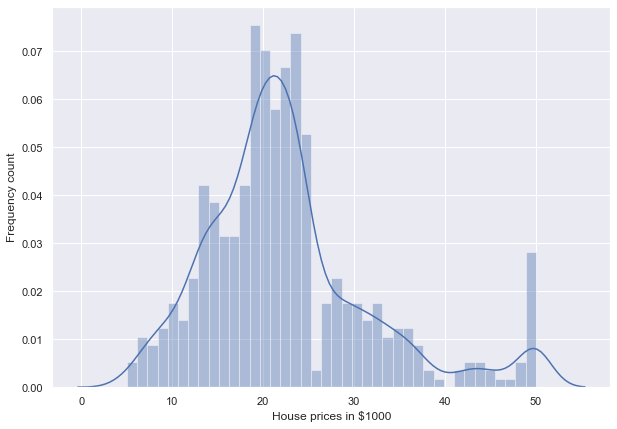

In [7]:
# For this we can use Seaborn:

import seaborn as sns

sns.set(rc={'figure.figsize':(10,7)})
sns.distplot(boston['PRICE'], bins=40)
plt.xlabel("House prices in $1000")
plt.ylabel("Frequency count")
plt.show()

Looking at the distribution, we can see that the house price values are relatively normally distributed, albeit with a small number of outliers, mostly to the right side which is producing a subtle skew. Most house prices appea to fall within the 15,000 to 25,000 range. 
We can also see how the $50,000 price is "pulling" the distribution to the right, and we have some notable peaks of kurtosisin the centre, but apart from this the data follows a relatively Gaussian fit.

Plotting the distribution of house prices is informative and necessary for gauging the scope and variance etc of the target variable, which will be the focus of our inferential analyses. Before we begin any inferentials, to get a flavour of what's really going on behind all those values, we can try to reveal some of the hidden traits that belong to the Boston data. For example, we could plot something that isn't so run-of-the-mill, such as the bivariate density of two features. 

For example, taking the original target variable (NOX), we could plot a density map of carbon monoxide and low-income people [7]. Bivariate data is simply data on each of two variables, where each value of one of the variables is paired with a value of the other variable. This plot is essentially a generalisation of a histogram which provides the best fit lines over the axes and the contour plots inside the axes [10].

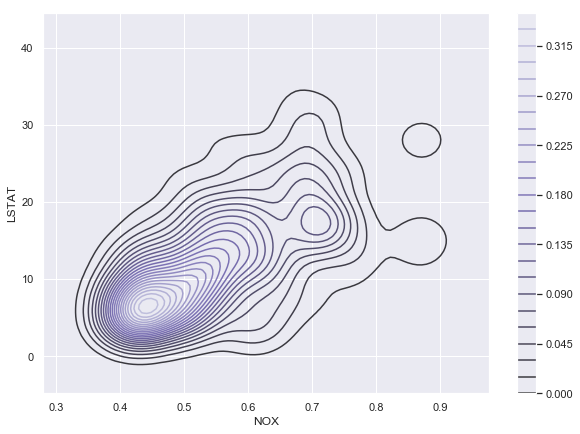

In [13]:
# Bivariate density of carbon monoxide and low income [8]. 

sns.kdeplot(boston["NOX"], boston["LSTAT"],n_levels=30, cmap="Purples_d", cbar= "True") 

This is a pretty intriguing plot, and it's trying to tell us something. We can see a large concentration of NOX in the lower left of the grid, still, it is difficult to envision the height dimensions. Let's plot the joint distribution and the marginal bivariate distributions together using a jointplot.

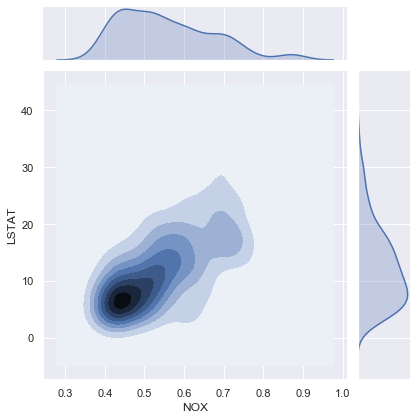

In [9]:
sns.axes_style('whitegrid')
sns.jointplot(boston["NOX"], boston["LSTAT"], boston, kind='kde') # [8].

Now it's more visually informative, in that we can see that most of the concentration of nitric oxides are found where between 0 and 10 percent of the lower income earners live.

It's good practice to construct a correlation matrix prior to any inferential testing in order to measure any linear relationships that exist among the variables. For example, if we wanted to create a multiple regression model to predict house prices, it would be prudent to create a correlation table first. One of the main reasons for doing this is to check for multicolinearity, e.g. when features (predictor variables) are strongly correlated to one another. Choosing predictors which are highly correlated can have a negative affect on the quality of the regression model. Another reason is for feature selection. A good model should be parsimonious but powerful, in that the strongly correlated (or heavily weighted) predictor variables have a notable effect on the target (or dependent) variable, in this way we can "drop" the not-so-strong predictors and omit them from our model so as to adhere to parsimony. A model which incoroporates too many predictor variables usually explains very little and can result in overfitting. 

Now let's make a matrix table. The correlation coefficients range from -1 to 1, with - 1 being a very strong negative correlation between two variables and 1 representing a very strong positive relationship.

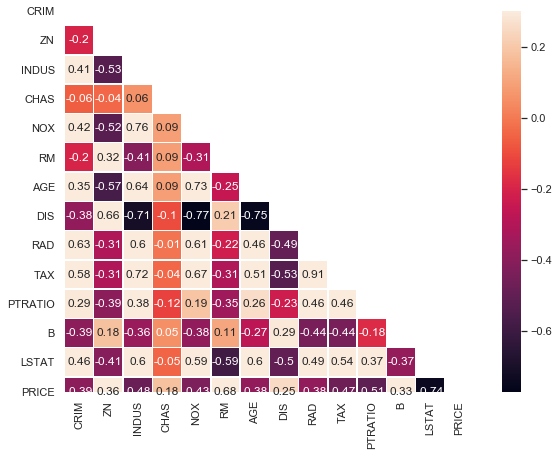

In [56]:
# [3][32]
corr = boston.corr().round(2)
# Truncate/mask mirrored half of heatmap:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, vmax=.3,annot=True, square=True, linewidths=.5)

Great, now we have a nice pragmatic matrix with a heatmap function to enhance the salience of the relationships. We can see there a quite a number or strong relationships, but what are some of the most interesting observations? Here are some to conisder.

- PRICE shares a very strong positive correlation with the number of rooms per house, i.e. RM (0.7), which intuitively makes sense. Houses with more rooms are typically more expensive. Indeed, more rooms would imply more space, thereby costing more.

- LSTAT displays a very high negative correlation with PRICE (-0.74). This may suggest that a notably large percentage of individuals of poor socio-economic status reside in houses which are of lower value. For a higher LSTAT, we would typically expect to see a lower PRICE. One reason for this effect may be that in an area dominated by "lower class" individuals would possibly lower the  actual demand or desire to live there. This could be for reasons such as safety, unmaintained or neglected surroundings and so on, thus driving the house prices down.

- There is a notable positive correlation between LSTAT and measures of NOX (0.59). It is pretty unsettling that lower income residents have higher levels of oxides surrounding them. Perhaps people with lower income or status live in houses closer to industrialised zones, which are less expensive to purchase for obvious reasons.  

- Another interesting observation is that there is a strong negative relationship between PTRATIO and PRICE (-0.51). But what might this allude to? It may be true that where there is a higher pupil to teacher ratio (too many pupils per teacher) there may also be more public schools where house prices are by association, usually also lower. Compare this to areas where houses are more expensive, these areas often have private schools which typically have a lower pupil to teacher ratio. 

- A salient example of multicolinearity is apparent between TAX and RAD (0.91). It seems the more accessibilty there is for certain dwellings, the more property tax they will pay. These variables may not be ideal candidates for building a regression model if they were selected together as predictors.

- Air quality also appears to have a gentle influence on house prices, displaying a moderate correlation (0.43). 

*** 
### Exploration of the Boston dataset part 1: Inferential statistics 
****

To begin  our inferential investigations, we'll examine the PRICE variable a little more closely. We have seen that he heatmap shows us the most notable variables related to PRICE appear to be bewteen RM, LSTAT and PTRATIO, insofar as these variables displayed the strongest correlation scores. So let's take a closer look at these relationships.

In [16]:
boston["RM"]= boston["RM"].round() # Round the room variable
price_rel = boston[["PRICE", "RM", "LSTAT", "PTRATIO"]]

price_rel

,PRICE,RM,LSTAT,PTRATIO
0,24.0,7.0,4.98,15.3
1,21.6,6.0,9.14,17.8
2,34.7,7.0,4.03,17.8
3,33.4,7.0,2.94,18.7
4,36.2,7.0,5.33,18.7
...,...,...,...,...
501,22.4,7.0,9.67,21.0
502,20.6,6.0,9.08,21.0
503,23.9,7.0,5.64,21.0
504,22.0,7.0,6.48,21.0


Now we'll put these values into a pairplot for a better visual story. 

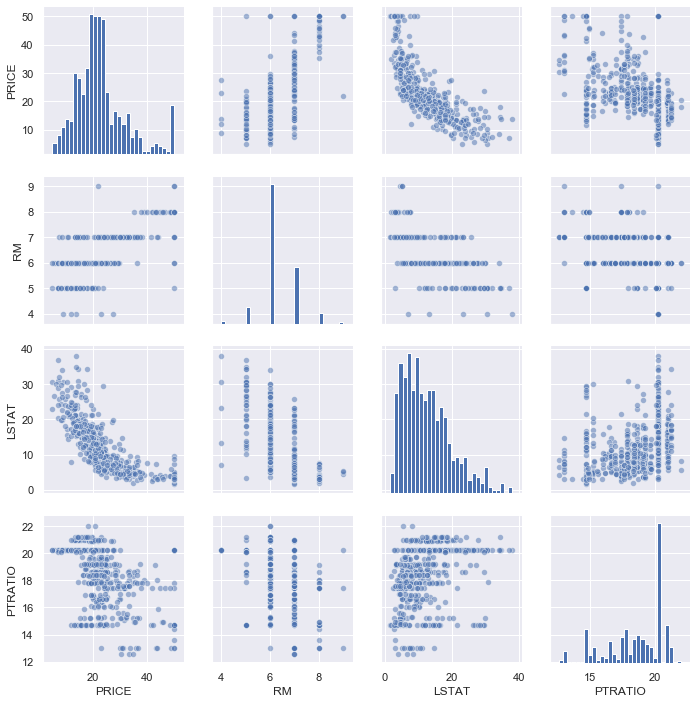

In [19]:
# https://seaborn.pydata.org/tutorial/axis_grids.html

sns.pairplot(price_rel,
plot_kws={'alpha': 0.5},
diag_kws={'bins': 30})

Looking at the pairplots it can be verified that strong correlations exist with PRICE versus RM and LSTAT. PTRATIO and RM show some correlation to PRICE but it is not as strong as the other two mentioned. Thus, it makes logical sense that these features will likely be important candidates to choose for training the data in a neural network. It can be argued that the LSTAT vs PRICE plot stands out most, in that it is appears to demonstrate a curvelinear pattern, which is quite intriguing.
We can explore what's going on in the curvelinear pattern further by applying some regression statistics.

y = -0.950049 x + 34.553841, r: -0.737663, r-squared: 0.544146,
p-value: 0.000000, std_err: 0.038733
Regression line with the scatterplot


No handles with labels found to put in legend.


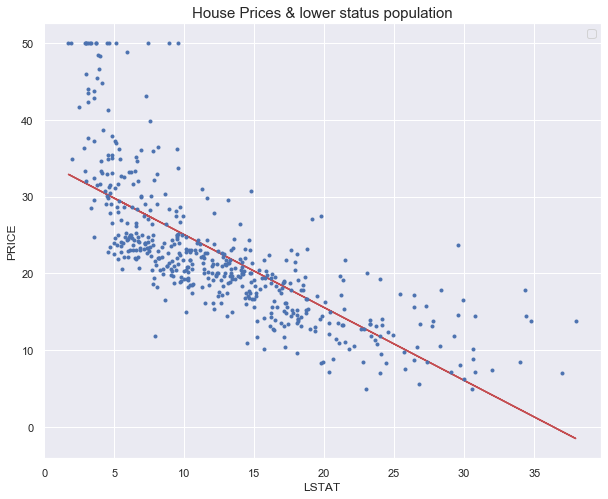

In [10]:
# Regression: [16]
# Using the dataset “Boston”, explore the association between the dependant 
# variable (e.g. PRICE) and the independent variable (e.g.: RM, LSTAT, PTRATIO etc).

# Matplotlib
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline

from scipy import stats 
import numpy as np 
x = boston['LSTAT']
y = boston['PRICE'] 

# Using lineregress to determine regression stats and line of best fit:
slope, intercept,r_value, p_value, std_err = stats.linregress(x,y) 
print("y = %f x + %f, r: %f, r-squared: %f,\np-value: %f, std_err: %f" 
      % (slope, intercept, r_value, r_value**2, p_value, std_err))

print("Regression line with the scatterplot") 
yhat = slope * x + intercept # regression line

# Adjusting the plot width and height
plt.figure(figsize=(10,8)) 

plt.plot(x, yhat, 'r-', x, y,'.') # change y to "yhat"to deletes line points
plt.xlabel('LSTAT') 
plt.ylabel('PRICE') 
plt.title("House Prices & lower status population", size=15)
plt.legend(loc="upper right")
plt.show()

The line of best fit doesn't look quite right for this relationship which is ostensibly a curvlinear one. We can use numpy.polyfit to fit a polynomial line, i.e. a vector of coefficients that minimises the squared error represented by the line.

No handles with labels found to put in legend.


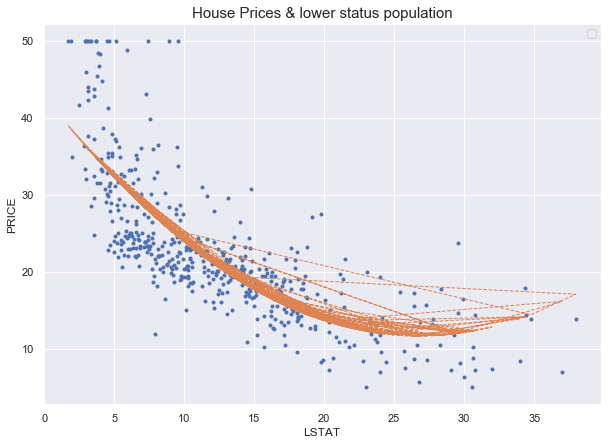

In [12]:
import numpy as np
sns.set(rc={'figure.figsize':(10,7)})

# Use polyfit: [17]

trend = np.polyfit(x,y,2)
plt.plot(x,y,'.')
trendpoly = np.poly1d(trend) 
plt.xlabel('LSTAT') 
plt.ylabel('PRICE') 
plt.title("House Prices & lower status population", size=15)
plt.legend(loc="upper right")
plt.plot(x,trendpoly(x), linestyle='dashed',linewidth=1) 

Now we can see the relationship a better. As PRICE decreases so too does LSTAT, but only up to a certain point, i.e. around $12,000 (or 25 on the LSTAT x-axis), after this a very brief plateau occurs and then both variables appear to increase together. This means that house prices decrease only to a certain point as lower income does the same, but no more than this threshold. 

Next let's plot individually RM and LSTAT with the target variable as they are highly correlated and good candidates for model predictors.

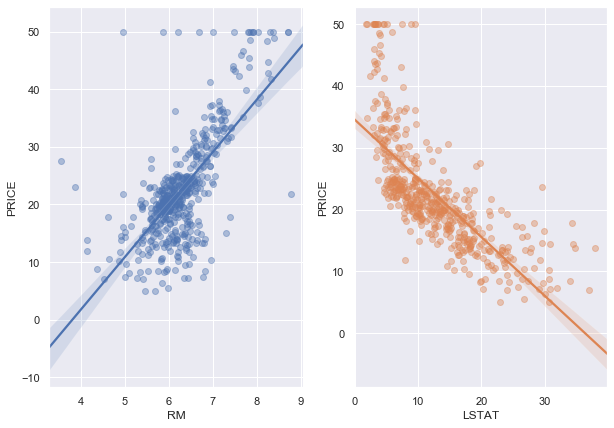

In [47]:
sns.set(rc={'figure.figsize':(10,7)})
fig, ax = plt.subplots(1,2) # [35]
sns.regplot('RM','PRICE', boston, ax=ax[0], scatter_kws={'alpha':0.4})
sns.regplot('LSTAT','PRICE', boston, ax=ax[1], scatter_kws={'alpha':0.4})
plt.show()

We have tow fine linear correlations, one positive, the other negative which should only really have beneficial effects on a potentila model. It is worth noting that the line of best fit is calculated by minimizing the ordinary least squares function that Seaborn implements automatically with its regplot function. The shaded area around the line represents 95% confidence intervals. A 95% confidence interval is a range of values that you can be 95% certain contains the true mean of the population (not the sample i.e. the Boston data itself). We can also visualize the residuals in each regression case by using a residual plot. In regression analysis, the difference between the observed value of the dependent variable (y) and the predicted value (ŷ) is called the residual.

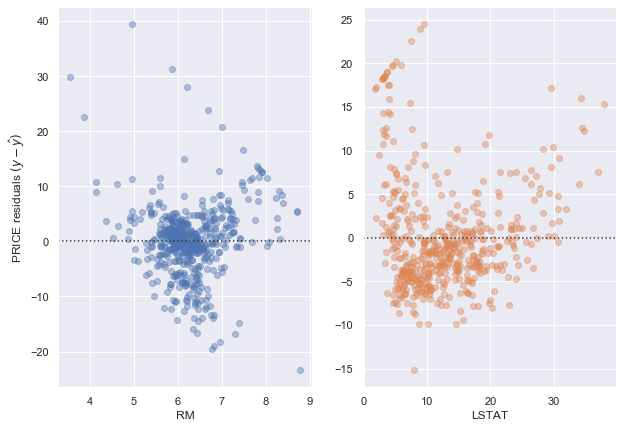

In [13]:
# Plot the residuals:

fig, ax = plt.subplots(1,2) # [35]
ax[0] = sns.residplot('RM','PRICE', boston, ax=ax[0], scatter_kws={'alpha':0.4})
ax[0].set_ylabel('PRICE residuals $(y-\hat{y})$')
ax[1] = sns.residplot('LSTAT','PRICE', boston, ax=ax[1], scatter_kws={'alpha':0.4})
ax[1].set_ylabel('')
plt.show()

The points in the residual plots represent the difference between the sample and the predicted value. Why is this relevant? Residuals that are greater than zero are data points that are "underestimated" by the regression and residuals less than zero are points that are *overestimated*, this is important for calculating "loss" in our model. For example, if we were to calculate the mean squared error of both of these feature variables against the target variable, we would be able to determine which feature is a stronger candidate for predicting house prices, and this is something that we should keep in mind when choosing feature variables for building a network later. Moreover, that network will incorporate a loss measurement that is based on calculating the mean squared error, or mean absolute error. Features that have lower error or loss are typically better predictors [34]. Now it's time to move on to our main inferential question.

***
**Inferential test question** - *Is there a significant difference in median house prices between houses that are along the Charles river and those that aren’t?*

Before we attempt to answer this question, we can visually examine the distribution of house prices under different room numbers and see whether houses on the Charles riverside have impact on increased house prices. For that, we first need to convert the RM variable values to an integer. As they are now, the RM values are in floating point form. We can convert them to integers by using the round function or math.floor function. We'll use the math.floor method.

In [39]:
boston["RM"]

0      6.575
1      6.421
2      7.185
3      6.998
4      7.147
       ...  
501    6.593
502    6.120
503    6.976
504    6.794
505    6.030
Name: RM, Length: 506, dtype: float64

Great, now let's get an idea of how the rooms are distributed across houses and whether those houses are near the river or not. To demonstrate this a boxplot is ideal. Houses that are beside the river are coded as "1" while those away from the river are "0".

Text(0.5, 1.0, 'House Prices categorized by river')

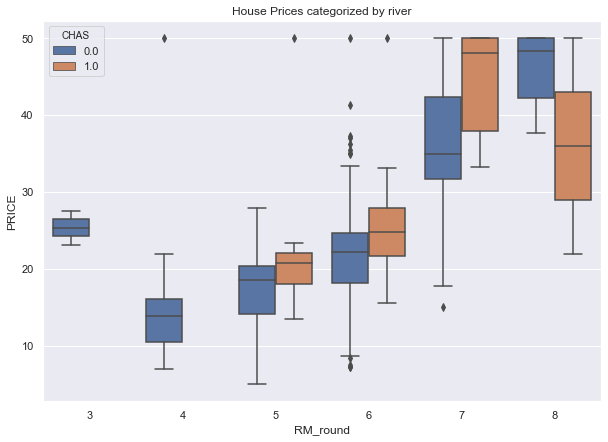

In [14]:
# Round the RM to an integer for visual purposes [9].
import math 

boston["RM_round"] = boston["RM"].map(math.floor)
sns.boxplot(x="RM_round", y = "PRICE", hue = "CHAS", data = boston, orient="v").set_title("House Prices categorized by river")

The boxplot distributions reveal interesting facets of the data. For example, all houses with less than 5 rooms are not adjacent or close to the river, and houses on the riverside clearly appear to be are more expensive than houses on the other side of or away from river. We can also see quite clearly that there are notably less houses close to the river than far from it. Boxplots centre around the median value and not the mean like in many other plots. Determining whether there is a significant difference in median house prices between houses that are along the Charles river and those that aren’t is what we are really interested in. So we can produce a "5 number summary" pertaining to the CHAS and PRICE features of the plot which is based on distances from the two median values.

In [15]:
# Five number summary [14]:

print("Below is the 5 number summary of house price arranged by location relative the river:")

print("The medians are:",boston.groupby('CHAS')['PRICE'].median()) # Median
print("The 1st quartiles are:", boston.groupby('CHAS')['PRICE'].quantile(0.25)) # 25th percentile
print("The 3rd quartiles are:",boston.groupby('CHAS')['PRICE'].quantile(0.75)) # 75th percentile
print("The minimum values are:", boston.groupby('CHAS')['PRICE'].min()) # Minimum
print("The maxium values are:", boston.groupby('CHAS')['PRICE'].max()) # Maximum

# Interquartile ranges:

Q1 = boston.groupby('CHAS')['PRICE'].quantile(0.25)
Q3 = boston.groupby('CHAS')['PRICE'].quantile(0.75)

IQR = Q3-Q1 # Formula for IQR

print("The interquartile ranges are:", IQR)

Below is the 5 number summary of house price arranged by location relative the river:
The medians are: CHAS
0.0    20.9
1.0    23.3
Name: PRICE, dtype: float64
The 1st quartiles are: CHAS
0.0    16.6
1.0    21.1
Name: PRICE, dtype: float64
The 3rd quartiles are: CHAS
0.0    24.80
1.0    33.15
Name: PRICE, dtype: float64
The minimum values are: CHAS
0.0     5.0
1.0    13.4
Name: PRICE, dtype: float64
The maxium values are: CHAS
0.0    50.0
1.0    50.0
Name: PRICE, dtype: float64
The interquartile ranges are: CHAS
0.0     8.20
1.0    12.05
Name: PRICE, dtype: float64


Looking at the 5 number summary above we can make some subtle observations. Remember, 0 represents houses that don't bound the river and 1 represents those that do. As previously observed the maximum house price appears to be cappped at $50,000. In addition the lowest house value of houses away from the river is almost three times lower than the lowest house value of houses nearby the river. The median values themselves are not hugely different, but we still need to run a statistical test to determine if there is a significant difference.

Let's take a look at the CHAS column:

In [8]:
river = boston['CHAS']
river.as_matrix()

C:\Users\Gareth Duffy\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1.,
       1., 1., 0., 0., 0.

Looking at the Charles river variable, it is immediately apparent there are fewer houses located adjacent to the river. We can partition the dataset into these two qualities, i.e. one slice comprised of houses located near the river and the rest which are located further away from it. 

In [16]:
# First we will split the CHAS variable into 2: Houses close to the river and house which are not:

near_river = boston[(boston['CHAS'] == 1)] #
far_river = boston[(boston['CHAS'] == 0)] #

#  Now we'll divide the full dataset based on this variable split:

dfriver = near_river,far_river
dfriver

(        CRIM    ZN  INDUS  CHAS     NOX     RM    AGE     DIS   RAD    TAX  \
 142  3.32105   0.0  19.58   1.0  0.8710  5.403  100.0  1.3216   5.0  403.0   
 152  1.12658   0.0  19.58   1.0  0.8710  5.012   88.0  1.6102   5.0  403.0   
 154  1.41385   0.0  19.58   1.0  0.8710  6.129   96.0  1.7494   5.0  403.0   
 155  3.53501   0.0  19.58   1.0  0.8710  6.152   82.6  1.7455   5.0  403.0   
 160  1.27346   0.0  19.58   1.0  0.6050  6.250   92.6  1.7984   5.0  403.0   
 162  1.83377   0.0  19.58   1.0  0.6050  7.802   98.2  2.0407   5.0  403.0   
 163  1.51902   0.0  19.58   1.0  0.6050  8.375   93.9  2.1620   5.0  403.0   
 208  0.13587   0.0  10.59   1.0  0.4890  6.064   59.1  4.2392   4.0  277.0   
 209  0.43571   0.0  10.59   1.0  0.4890  5.344  100.0  3.8750   4.0  277.0   
 210  0.17446   0.0  10.59   1.0  0.4890  5.960   92.1  3.8771   4.0  277.0   
 211  0.37578   0.0  10.59   1.0  0.4890  5.404   88.6  3.6650   4.0  277.0   
 212  0.21719   0.0  10.59   1.0  0.4890  5.807   53

Great, now let's eyeball the house prices pertaining to both cohorts of house owners based on our variable split:

In [17]:
# Filter all house prices based on houses being located near the river:

near_river['PRICE']

142    13.4
152    15.3
154    17.0
155    15.6
160    27.0
162    50.0
163    50.0
208    24.4
209    20.0
210    21.7
211    19.3
212    22.4
216    23.3
218    21.5
219    23.0
220    26.7
221    21.7
222    27.5
234    29.0
236    25.1
269    20.7
273    35.2
274    32.4
276    33.2
277    33.1
282    46.0
283    50.0
356    17.8
357    21.7
358    22.7
363    16.8
364    21.9
369    50.0
370    50.0
372    50.0
Name: PRICE, dtype: float64

In [54]:
# And filter prices based on far from river:

far_river['PRICE']

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: PRICE, Length: 471, dtype: float64

So notably more people live away from the river than close to it, let's check the count of this feature anyway:

In [55]:
# Output column value count:

print(near_river.count())
print(far_river.count())

CRIM       35
ZN         35
INDUS      35
CHAS       35
NOX        35
RM         35
AGE        35
DIS        35
RAD        35
TAX        35
PTRATIO    35
B          35
LSTAT      35
PRICE      35
dtype: int64
CRIM       471
ZN         471
INDUS      471
CHAS       471
NOX        471
RM         471
AGE        471
DIS        471
RAD        471
TAX        471
PTRATIO    471
B          471
LSTAT      471
PRICE      471
dtype: int64


So a modest 35 houses only are located adjacent to the river while 471 are situated further away. Let's revert back to our initial question concerning the difference in median house price. To investigate this, we could adopt take a slightly different approach than that of a "normal" t-test. Instead of calculating the *mean* house price of the two groups, we could instead calculate and compare the median of the *already median-based* measurement (implicit in the PRICE variable itself). Indeed, this was a dataset taken from the 1970's, and we could stick go with the researchers original convention by examining the median as our benchmark for determining if there lies any significant price difference. This would be akin to determining "the median of the median price values". Before we find this out let's gauge the mean values first.

In [62]:
print("Mean house price near river:",near_river['PRICE'].mean())
print("Mean house price far from river:",far_river['PRICE'].mean())

Mean house price near river: 28.44
Mean house price far from river: 22.093842887473482


Now we'll inspect the medians.

In [61]:
# Median values for both cohorts:

print("Median house price near river:",near_river['PRICE'].median())
print("Median house price far from river:",far_river['PRICE'].median())

Median house price near river: 23.3
Median house price far from river: 20.9


Okay, so the median prices may not seem too different at first glance but we still need to test that out. To test if there lies a significant difference between two independent groups such as these, we would typically use a t-test which takes the *mean* of both groups and tests if there is a notable difference based on that value. That said, in this particular case it would be interesting to respect the original method of measurement on the house price variable, i.e. median (instead of mean). So, looking at the output above, can we tell if there is a significant difference in house prices? Not really, but it does appear that houses near the river are more expensive. We'll run a median t-test to see if there is a significant difference to confirm this. Here, we want to conduct a test to see if there is a notable difference between the two medians of the assumingly unrelated groups. Like almost all inferential tests, a t-test comes with assumptions. The assumptions that the data must adhere to in order for the results to be valid are as follows [20]:

- The group samples are independently and randomly drawn
- The distribution of the residuals between the two groups should follow a normal distribution.
- The variances of the two groups are equal.

Returning to our investiagtions, why else would we use the median and not mean as a measurement? Well, most of the time we would use a t-test based on the mean as it is the most common measure of central tendency. The purpose of the mean or median (or even mode) is to provide a one number summary of a set of data. The mean itself is actually easier to calculate (at least by hand), and allows simple calculations of confidence intervals using statistical tables. Rapidly calculating medians and interquartiles ranges came later in computer science. That's all well and good, but why might someone choose the median as a measure for a *statistical* test? 

One reason is that the median is a "resistant" value which is largely unaffected by outliers. The mean on the other hand, can be easily skewed in numerous ways just because of one or two extreme high or low values residing in the data distribution. For example, if we had a median of 5 and an outlier value of 80, the median will still never stray too far from the 5. Another reason is that some analysts live by the rule whereby they tend to use the mean with normally or symmetrically distributed data, and for anything else they will use the median, whereby if their data doesn't meet normality checks or similar assumptions, they will use the median instead. Indeed, when sample sizes are large and have few outliers, the mean score typically affords a better measure of central tendency. By contrast, the median is better for testing significance when a distribution is skewed by using a non-parametric test such as the Kruskal Wallis. Our data *is* as such so it seems appropriate in this case. That said, the take home consensus seems to be that while the median is robust and less fickle than the mean, the mean wins out of pure popularity and legacy [21]. 

**What type of median test should we use?**

The typical choice of median test is either a *Kruskal Wallis H-test* or a *Moods Median test*. Although both tests are of the non-parametric variety, they are both very reliable. For the present purpose, we will focus mainly on the Moods Median Test result. Let's compare the qualities of both and test them out:

- ***Kruskal Wallis Test***: The Kruskal–Wallis H-test is a non-parametric method for testing whether samples originate from the same distribution. It is used for comparing two or more independent samples of equal or different sample sizes. It is used for comparing only two groups. A significant Kruskal–Wallis test indicates that at least one sample stochastically dominates one other sample. Since it is a non-parametric method, the Kruskal–Wallis test *does not assume a normal distribution of the residuals*. If the researcher can make the assumptions of an identically shaped and scaled distribution for all groups, except for any difference in medians, then the null hypothesis is that the medians of all groups are equal, and the alternative hypothesis is that at least one population median of one group is different from the population median of at least one other group [6]. 


- ***Moods Median Test***: Mood's median test is a special case of Pearson's chi-squared test. It is also non-parametric and tests the null hypothesis that the medians of the populations from which two or more samples are drawn are identical. The data in each sample are assigned to two groups, one consisting of data whose values are higher than the median value in the two groups combined, and the other consisting of data whose values are at the median or below. A Pearson's chi-squared test is then used to determine whether the observed frequencies in each sample differ from expected frequencies derived from a distribution combining the two groups [15]. With SciPy, the Moods Median tests that two or more samples come from populations with the same median. The “grand median” of all the data is computed, and a contingency table is formed by classifying the values in each sample as being above or below the grand median [6].

Before we try any testing, lets check the variance, skewness and kurtosis of the groups then check our assumptions.

In [36]:
# Check for skewness, kurtosis and variance [20] 
# Output to be better formatted*

from scipy import stats

print("Houses far from river:", stats.describe(far_river['PRICE']))
print("Houses close to the river:", stats.describe(near_river['PRICE']))


Houses far from river: DescribeResult(nobs=471, minmax=(5.0, 50.0), mean=22.093842887473464, variance=77.9929620093057, skewness=1.0535392064190594, kurtosis=1.512342873001833)
Houses close to the river: DescribeResult(nobs=35, minmax=(13.4, 50.0), mean=28.439999999999998, variance=139.63305882352938, skewness=0.9021059082456354, kurtosis=-0.5438936600086546)


So we can read the min and max values the variance and the skewness and kutosis, great. The variance measures how far the values are spread out from their mean. Skewness is a measure of symmetry, or more precisely, the lack of symmetry. A distribution is symmetric if it looks the same to the left and right of the centre point. Kurtosis is a measure of whether the data are heavy-tailed (high) or light-tailed (low) relative to a normal distribution. We would much prefer to see these properites on a plot to confirm what the values tell us.

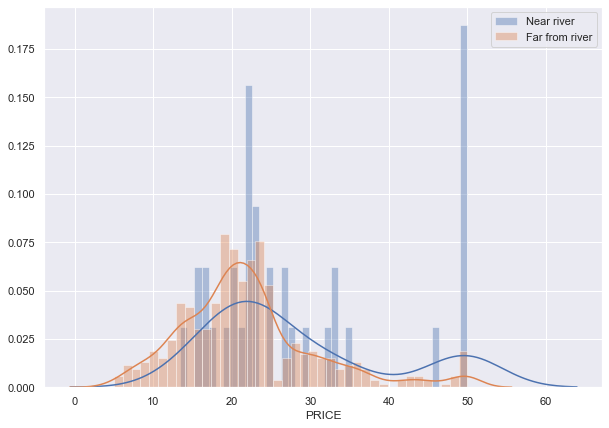

In [31]:
sns.set(rc={'figure.figsize':(10,7)})
sns.distplot(near_river['PRICE'], bins=40, label='Near river')
sns.distplot(far_river['PRICE'], bins=40, label='Far from river')
plt.legend()
plt.show()

Yes, the variance of the houses near the river is greater and we can see this. We can also how the houses near the river are skewed to the right more than the houses far from the river (due to that outlier on the far right) which confirms the skewness values themselves (1.05 vs 0.90). The higher kurtosis value of houses far from the river (1.51) compared to that of houses near the river (0.54) is readily apparrent in the plot. While it is not of immediate conern to us, the median price of the houses close to the river does in fact appear to significanlty greater than those far from the river.

**Assumption of normality checks**

Before running any statistical test it is prudent to conduct normality checks to confirm whether or not our data adheres to various assumptions. First we will check the homogeneity i.e. equality of variances using Levene's test in scipy.stats. Provided the Levene result's p value is not significant, i.e. not less than 0.05, we can proceed with confidence. Let's take a look.

In [64]:
stats.levene(far_river['PRICE'], near_river['PRICE'], center= "median") # The default centre is "median" which is appropriate in this case

LeveneResult(statistic=4.590342218715871, pvalue=0.03263097600633006)

The Levene's tests is less than 0.05 i.e. statistically significant, which indicates that the group variances are unequal in the population. This might suggest that if the rest of our normality checks find similar outcomes i.e. trangress our assumptions, then we should be very careful in our interpretation of our median t-test.

Next, we'll check the assumption of normality. Here the residuals should be normally distributed. To calculate the residuals between the two groups we simply subtract the values of one from the other:

In [65]:
# The index’s should be reset so the residuals can be calculated later:
far_river.reset_index(inplace= True)
near_river.reset_index(inplace= True)

# Calculate the residuals between the groups:
diff = far_river['PRICE'] - near_river['PRICE']
diff

0      10.6
1       6.3
2      17.7
3      17.8
4       9.2
       ... 
466     NaN
467     NaN
468     NaN
469     NaN
470     NaN
Name: PRICE, Length: 471, dtype: float64

We can check the normality visually or with a formula test. Visually, we could use a qq plot, pp plot or histogram. Alternatively we can also use the Shapiro-Wilk test for normality. 

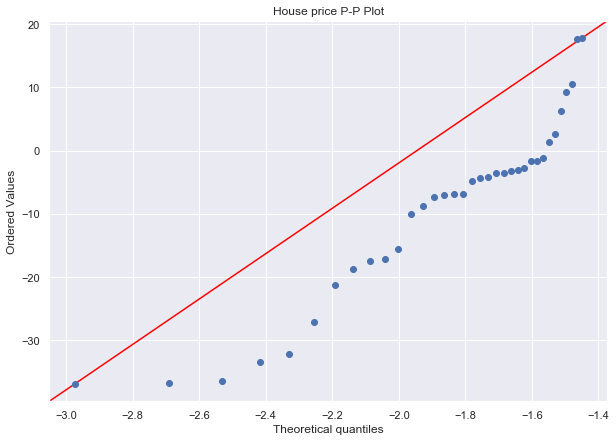

In [67]:
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms

# Add plot line for comparison [19]
fig, ax = plt.subplots()
line = mlines.Line2D([0, 1], [0, 1], color='red')
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)

stats.probplot(diff, plot= plt)
plt.title('House price P-P Plot') 
plt.show('House price residuals')

With pp plots, the dots should fall on the red line. If the dots are not on the red line then it’s an indication that there is deviation from normality. Some deviations from normality is fine, as long as it’s not severe. Looking at ours, we can definitely see some deviation, but it doesn't seem too severe in that the data maintains relative normality. Let’s take a look at the histogram next to see of they are normally distributed, for this we'll call back our residuals.

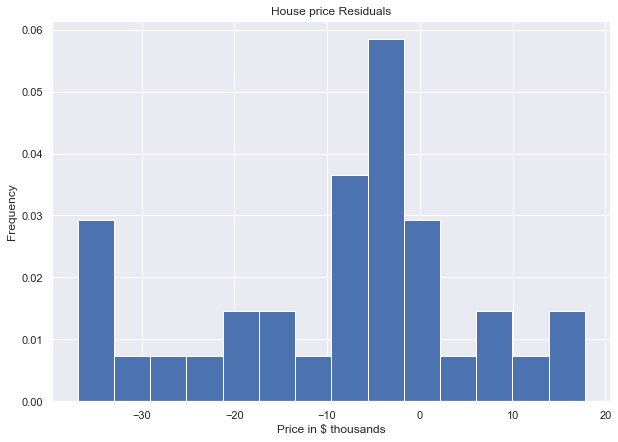

In [69]:
import numpy as np
import scipy.stats as stats
from scipy.stats import norm

# incorporate residuals:
diff.plot(bins = 14, normed=True, kind= "hist", title= "House price Residuals") # plot the residuals
plt.xlabel("Price in $ thousands")
plt.show("Residuals Plot of House price")

The residuals seem fine. Now let's do a Shapiro Wilk test which tests the null hypothesis that the data was drawn from a normal distribution. The shapiro()SciPy function will calculate this and reurn both the W statistic and the p value. If the p value is not significant, i.e. less than 0.05, then the data is likely drawn from a normal distribution [22]. 

In [127]:
# Shapiro-Wilk Test [22]

from scipy.stats import shapiro
# normality test
stat, p = shapiro(diff)
print('Statistics = %.3f, p = %.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks normal (Fail to reject H0)')
else:
    print('Sample does not look normal (Reject H0)')

Statistics = nan, p = 1.000
Sample looks normal (Fail to reject H0)


To summarise, the normality checks were not too bad. The Levene's test was the only check that violated our assumptions slighlty. That said, it seems safe to continue with confidence and conduct our median test. 

Let's get testing our groups, first with the Kruskal Wallis test.

***
**Kruskal Wallis  H-test**:

In [73]:
# [12],[13]
# non-parametric method:
# Kruskal Wallis  H-test tests the null hypothesis that the population median of all of the groups are equal. 
# It is a non-parametric version of ANOVA.
from scipy.stats import kruskal
from scipy import stats

# compare samples
stat, p = kruskal(near_river['PRICE'], far_river['PRICE'])
print('Statistic =%.4f, \np =%.4f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distributions (we fail to reject the H0)')
else:
    print('Different distributions, (we reject the H0)')

Statistic =9.9847, 
p =0.0016
Different distributions, (we reject the H0)


We can see the p value shows a significant difference in median house prices. In fact, a highly significant one. This means that house which are located where the tract bounds the river are significantly *more* expensive than houses which don't. Still, we should remember that there are notably less of these expensive houses compared to cheaper units. Let's conduct the Moods median test to verify if that produces a similar significant result. 

**Moods Median Test:**

In [74]:
# [6] 

from scipy.stats import median_test
from statistics import median
stat, p, med, tbl = median_test(near_river['PRICE'], far_river['PRICE'])

In [75]:
# The grand median

med

21.2

In [42]:
# The contingency table:
# The shape of the table is (2, n), where n is the number of samples. 
# The first row holds the counts of the values above the grand median, 
# and the second row holds the counts of the values below the grand median. 
# The table allows further analysis with, for example, scipy.stats.chi2_contingency

tbl

array([[ 26, 224],
       [  9, 247]], dtype=int64)

In [43]:
# The p value of the median test:

p

0.004026327394058504

In [44]:
# The test statistic: 
# The statistic that is returned is determined by lambda_. 
# The default is Pearson’s chi-squared statistic.

stat

8.271903391340615

Excellent, just like our Kruskal Wallis, the p value of the Moods test is also highly significant (less that alpha levels 0.05 and 0.01). Because the p value shows a significant difference in median house prices across both tests, we can be confident that the houses closer to the river are significantly more expensive than those further away, and that this is not the result of randomness or chance. We will offer a tentative interpretation of why this is the case a little later, for now let's take another look at our plot to appreciate this fact.

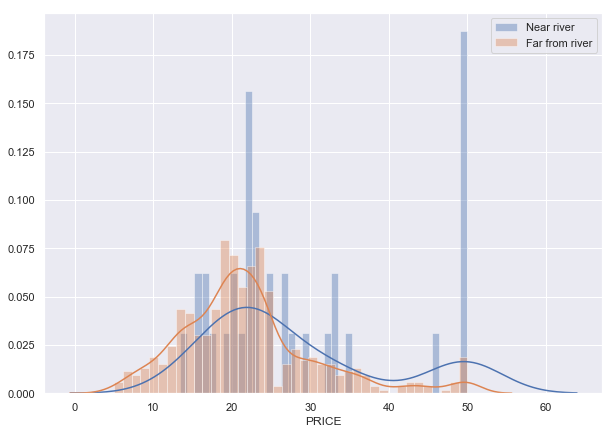

In [46]:
# House prices but this time with groups differenciated by colour:

sns.set(rc={'figure.figsize':(10,7)})
sns.distplot(near_river['PRICE'], bins=40, label='Near river')
sns.distplot(far_river['PRICE'], bins=40, label='Far from river')
plt.legend()
plt.show()

Next we will start something a little more exciting and begin building a neural network. The aim here is to reliably predict house prices from a selection of the Boston data features.

***

**Predictive test question** - Predict median house price based on the other variables in the dataset.

***
### Designing a Neural Network to predict house prices (With Keras & TensorFlow)
***
<img src="https://i.ibb.co/pjpzYG4/keras-tensor.jpg" alt="keras-tensor" border="0">

***

### What is a neural network?

A neural network is a computer program that operates in a similar manner to the human brain. The primary appeal of neural nets is their ability to emulate the brains pattern-recognition skills and "learn". A good analogy is that of a black box that takes inputs like the census of a self-driving car. The neural net has many small units called neurons which are grouped into several layers. These layers are columns that are connected to each other through their neurons. 

Each neuron is connected to another layers neuron through "weighted" connections. The weights are adjusted with a real-valued number that is assigned to them. A neuron takes a value of the connected neuron (in that layer) and multiplies it with the connections weight. The sum of all the connected neurons is the neurons "bias" (value). The bias is then put through an activation function which transforms (mathematically) the value and assigned it to the connected neuron in the adjacent layer, and this process is propogated through the entire network

The network is essentially like a filter, which sifts through all the possibilites, so that the computer can infer the "correct" answer. The real challenge is finding the right weights, i.e. the neuron value, in order to calculate the correct outputs. The weights are attained via "learning". When training the network we typically used a supervised learning approach wherein each training example contains the value of both the inputs and desired output. Let's prime ourselves with the most important terms before we begin creating the network [33],[34].

- **Neuron:** An information processing unit in a neural network. Each neuron processes some input by applying an “Activation Function” and serves the result of the activation function as its output. 

- **Activation function:** The function that we pass the input information through in a neuron. This function can enhance or decay the quality of the network.

- **Loss function** (or cost function): The function that is being minimized when training the network. This function measures the difference between the desired outcome and the outcome predicted by the network. The size of this difference informs how much the parameters at each neuron are changed with each iteration. Two of the activation functions we will use in this project are described below as examples.

- **Sigmoid:** A common activation function. S-shaped curve that ranges between 0 and 1. Neurons are sometimes referred to as “sigmoid neurons,” meaning they are neurons that use the sigmoid activation function.

- **Rectified Linear Unit (ReLU):** Activation function that is zero for negative x values and a straight line for positive x values. ReLU is used more frequently than sigmoid and tanh because it’s more computationally effective.

- **Optimizer:** Optimizers helps us to minimize (or maximize) an error function E(x) which is simply a mathematical function dependent on the model’s internal learnable parameters which are used in computing the target values(Y) from the set of predictors(X) used in the model. For example — we call the weights(W) and the bias(b) values of the neural network as its internal learnable parameters which are used in computing the output values and are learned and updated in the direction of optimal solution i.e minimizing the Loss by the network’s training process and also play a major role in the training process of the neural network model.

- **Learning rate:** The speed at which the model changes weights and bias terms with each iteration. 

- **Epoch:** An arbitrary cutoff, generally defined as "one pass (iteration) over the entire dataset", used to separate training into distinct phases, which is useful for logging and periodic evaluation

- **Batch size:** Portion of the training set that is used in each iteration.

- **Weight:** Each neuron has weights that multiply each input which goes into the activation function.

- **Bias:** Constant added to each input that is used for a neuron’s activation function.

<img src="https://i.ibb.co/Kznb7tW/neural-net-imagebest.png" alt="neural-net-imagebest" border="0">

Let's get the neural network started, we'll import our libraries and packages necessary for the job.

In [6]:
# Necessary libraries:
# Always import as :from tensorflow.keras (DONT MIX THEM)

import tensorflow
# import keras as kr
import tensorflow.keras as kr # Solves common errors (instead of just keras)
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, Activation;
from tensorflow.keras.models import Sequential
from keras.preprocessing.text import Tokenizer
import json;
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10, 10) # Increase the size of the plots

### Feature selection

**What features should we choose for our model?**

Feature selection is a core concept in machine learnig which has a huge impact on the performance of your model. For example, irrelevant or partially relevant features can negatively impact your models performance. Moreover, retaining irrelevant features in the model can decrease the accuracy and cause it to learn based on irrelevant features.

**What are the benefits of feature selection?**

- Reduces overfitting: Less redundant data means less oportunity to make decisions based on "noise".
- Improves accuracy: Less misleading data means accuracy improves.
- Reduces training time: Fewer data points reduce algorithm complexity which facilitates faster training.

Statistical tests can be used to select those features that have the strongest relationship with the output variable. For example scikit-learn provides a suite such tests. With scikit we can get the "importance" of each feature using the importance property of the model. Feature importance gives us a score for each feature, i.e. the higher the score, the more relevant it is towards our target output variable. Alternatively we can gauge the importance and relevance of each feature from our correlation heatmap which we generated earlier.

From considering the heatmap above, we know that RM, LSTAT and PTRATIO are the most highly correlated features with PRICE and they are not too heavily correlated with each other which avoids the potential issue of multi-collinearity (occurrence of high intercorrelations among independent variables). I feel it will be also interesting to add a couple of "neighbourhood" variables, i.e. INDUS, TAX and CRIM and the also the pollution variable NOX. I feel this choice affords a niced blend of features to predict price. It is also worth noting that TAX, INDUS, RAD and NOX are special features which are related to each other in meaningful ways but also influence PRICE.


**The importance of loss: What is “loss” when training a neural network?**

At the most basic level, a loss function quantifies how “good” or “bad” a given predictor is at classifying the input data points in a dataset. The smaller the loss, the better a job the regressor (or classifier) is at modeling the relationship between the input data and the output targets. That said, there is a point where we can overfit our model — by modeling the training data too closely, our model loses the ability to generalize. We, therefore, seek to:

- Drive our loss down, thereby improving our model accuracy.
- Do so as fast as possible and with as little hyperparameter updates/experiments.
- All without overfitting our network and modeling the training data too closely.

This process is a balancing act and our choice of loss function and model optimizer can dramatically impact the quality, accuracy, and generalizability of our final model. Typical loss functions include:

- Mean Squared Error (MSE)
- Mean Absolute Error (MAE)
- Binary cross-entropy
- Categorical cross-entropy
- Standard Hinge
- Squared Hinge

MAE and MSE are the two prime candidates in our situation considering our problem is of regression type. For now it is important to understand that for most tasks loss measures the “goodness” of your model and the smaller the loss, the better, but you need to be careful not to overfit. Let's select our features that we want to use in our network and also the distibution of the PRICE variable so we can decide on what loss function we might employ [29].

Let's begin...

In [7]:
# Feature selection:

# PRICE (output)
plt.rcParams['figure.figsize'] = (10, 10)

# 13 potential features
# Set x and y (inputs and output)
boston['RM']= boston['RM'].round() # round room numbers for tidyness

features = boston[['RM','LSTAT','PTRATIO','TAX','NOX','INDUS','CRIM','PRICE']]
#inputs

#target = boston['PRICE']
#output

# Construct new dataframe:
bostonSelect = features
bostonSelect

,RM,LSTAT,PTRATIO,TAX,NOX,INDUS,CRIM,PRICE
0,7.0,4.98,15.3,296.0,0.538,2.31,0.00632,24.0
1,6.0,9.14,17.8,242.0,0.469,7.07,0.02731,21.6
2,7.0,4.03,17.8,242.0,0.469,7.07,0.02729,34.7
3,7.0,2.94,18.7,222.0,0.458,2.18,0.03237,33.4
4,7.0,5.33,18.7,222.0,0.458,2.18,0.06905,36.2
...,...,...,...,...,...,...,...,...
501,7.0,9.67,21.0,273.0,0.573,11.93,0.06263,22.4
502,6.0,9.08,21.0,273.0,0.573,11.93,0.04527,20.6
503,7.0,5.64,21.0,273.0,0.573,11.93,0.06076,23.9
504,7.0,6.48,21.0,273.0,0.573,11.93,0.10959,22.0


Now let's gauge our price distribution:

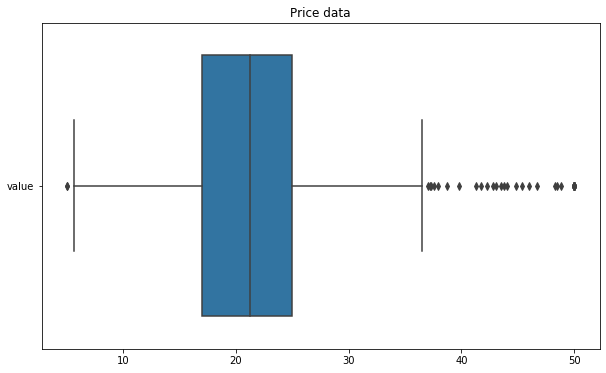

In [8]:
plt.figure(figsize=(10,6))
sns.boxplot(data=pd.melt(boston[['PRICE']]),orient="h").set_title("Price data")
plt.show()

We can clearly see the price variable has a number of upper outliers, this needs to be considered when choosing a model performance metric. We'll come back to this soon, first let's split of data for training and testing.

In [12]:
# Split the data into train and test
# So we can use the test set to evaluate our model

# Make an 80/20 train/test partition:
train_dataset = bostonSelect.sample(frac=0.8,random_state=0)
# Isolate the testing set:
test_dataset = bostonSelect.drop(train_dataset.index)

# Check our train/test count:
print(train_dataset.count())
print(test_dataset.count())

RM         405
LSTAT      405
PTRATIO    405
TAX        405
NOX        405
INDUS      405
CRIM       405
PRICE      405
dtype: int64
RM         101
LSTAT      101
PTRATIO    101
TAX        101
NOX        101
INDUS      101
CRIM       101
PRICE      101
dtype: int64


In [13]:
train_stats = train_dataset.describe()
train_stats.pop("PRICE")
train_stats = train_stats.transpose()
train_stats.round(2)

,count,mean,std,min,25%,50%,75%,max
RM,405.0,6.26,0.71,4.00,6.00,6.00,7.00,9.00
LSTAT,405.0,12.64,7.09,1.73,7.19,11.32,16.65,37.97
PTRATIO,405.0,18.44,2.14,12.60,17.30,18.80,20.20,22.00
TAX,405.0,405.84,164.06,187.00,284.00,334.00,666.00,711.00
NOX,405.0,0.55,0.12,0.38,0.45,0.54,0.62,0.87
INDUS,405.0,11.10,6.70,0.74,5.32,9.69,18.10,27.74
CRIM,405.0,3.67,8.98,0.01,0.08,0.27,3.47,88.98


In [14]:
# Split our input (features) from our output (label)
# We want our model to predict the label
# pop PRICE from dataFrame: https://www.geeksforgeeks.org/python-pandas-dataframe-pop/
train_labels = train_dataset.pop('PRICE')
test_labels = test_dataset.pop('PRICE')

**Pre-modelling Standardization and scaling**

It is good practice to normalize the input feature which use different scales and ranges. When numeric input data features have values with different ranges, each feature should be scaled independently to the same range.For example, PTRATIO is a percentage value while RM is of type integer. While our model may converge with normalization, it can make training more difficult and makes the resulting model contingent upon the choice of unit measurements used in the inputs. Before we do that we'll have a quick look at the training data set stats. It is important to preprocess our data before feeding it to the network. Note that we only rescale the features and not the label column.

In [15]:
# Now we can normalize our data: [26]

def norm(x):
  return (x - train_stats['mean']) / train_stats['std']

# Normalize train/test datasets:
# "norm" is a function that takes a vector as an input and returns a scalar value
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

Next that we've normalized our data, we can produce a scaled boxplot of all our training data and testing data to check for outliers:

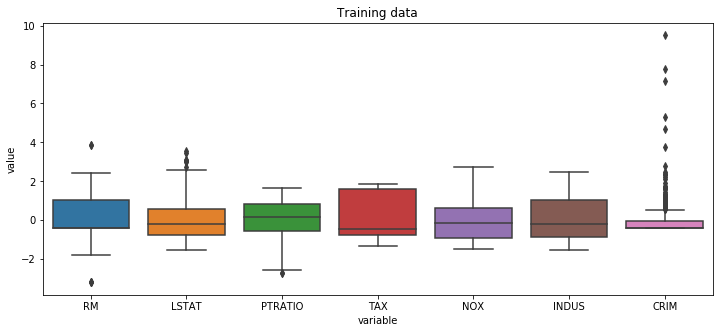

In [16]:
plt.figure(figsize=(12,5))
sns.boxplot(x="variable", y="value", data=pd.melt(normed_train_data)).set_title("Training data")
plt.show()

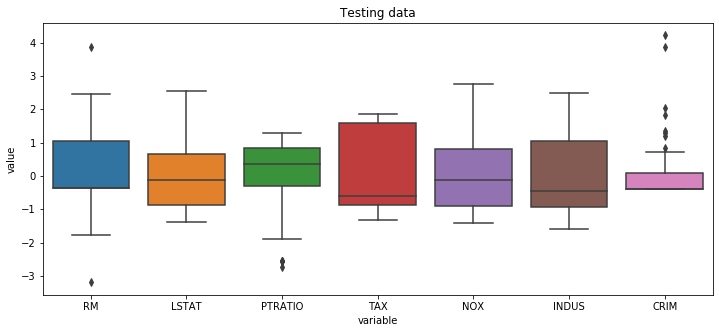

In [17]:
plt.figure(figsize=(12,5))
sns.boxplot(x="variable", y="value", data=pd.melt(normed_test_data)).set_title("Testing data")
plt.show()

Looking at both normalized plots, we can see we have quite a large number of outliers in the CRIM distribution, mostly at the upper end of the statistical spectrum. We also have a few in the RM, LSTAT and PTRATIO features. So, the outliers in both sets are similar, with most of them at the high end segment of the housing market, but patterns underlying house prices present in the testing data may not be captured fully during the training process, because the statistical sample is slightly different. The only way to find out is to build the neural network regression model.

**Choosing a performance metric**

Mean squared error (MSE), and mean absolute error (MAE) are both commonly used to evaluate the regression problem's accuracy in a neural network. Error is the absolute difference between the actual (true) values and the predicted values. The mean absolute error (MAE) is the simplest regression error metric to understand. Here, we calculate the residual for every data point, taking only the absolute value of each so that negative and positive residuals do not cancel out. We then take the average of all these residuals. The mean square error (MSE) is just like the MAE, but squares the difference before summing them all instead of using the absolute value. 

Great, but which one should we use for our present scenario? Let's consider the facts:

MAE is very sensitive and robust to outliers in comparison to MSE, since it doesn't punish huge errors. This is because it is the median of all of the absolute values of the residuals, and the median is unaffected by values at the tails. So, this loss function can be used to perform very robust regression. It is usually used when the performance is measured on continuous variable data. It gives a linear value, which averages the weighted individual differences equally. The lower the value, better is the model's performance.  

MSE is also commonly used, but least useful when a single bad prediction would ruin the entire model's predicting abilities, i.e when the dataset contains a lot of noise. Mathematically, it is the preferred loss function under the inference framework of maximum likelihood if the distribution of the target variable is Gaussian. However, it is not robust to outliers in the way MAE is [31]. 

Let's weigh up the facts of both loss functions to our present data. Firstly, we know that we are measuring a continuous variable (PRICE) which means MAE is typically preferable. We also know that we have a number of outliers in our data. The price variable is also not notably Gaussian (normally distributed), and while that is true, we would like to not punish outliers and compromise the model because of them. More specifically, on some regression problems (including this one) the distribution of the target variable may be mostly Gaussian, but may have outliers, e.g. large or small values far from the mean value. The Mean Absolute Error, or MAE, loss is an appropriate loss function in this particular case as it is more robust to outliers [31]. Thus, we can be be confident choosing MAE as our metric over MSE is suitable in this case, but we should still add MSE as a secondary metric anyway. 

We will optimize the model with *Adam* and define our loss measurement with MAE, this way we can have an estimate about what the true error is in terms of thousand of dollars (price). Now we can use the normalized data to train the model. First we will build a model layer by layer sequentially. We have 7 feature variables and I have decided to have the first input layer built with 49 neurons and Relu as its activation. The second layer has 35 neurons with Sigmoid as activation and a third layer with 21 neurons and softplus as activation. The final output layer has only one output neuron and a linear activation which is standard practice for a regression model predicting a continuous target variable. This particular network design was based on an informed combination of trial and error optimisation, utilisation of parsimony based on the 7 input variables combined with a certain aspect of guesswork.

**The importance of mean squared error as additional metric, and irrelavence of accuracy as additonal metric**

Mean Squared Error (mse) is a common loss function used for regression problems (different loss functions are used for classification problems). The loss function (Mean Square Error in this case) is used to indicate how far our predictions deviate from the target value. In the training phase, the weights are updated based on this quantity. In the case of a regression type problem like ours here, there is no real justification for calculating an accuracy metric as there are no "right" or "wrong" decisions to measure, and when predicting a continuous target variable such as PRICE, the accuracy metric has no relevant meaning, instead we should incorporate the mse to evaluate the performance of the network [28]. 

**Layers** 

Notice how we only specify the input shape of the first layer, all layers following this layer will automatically know their input shape from the previous one. The activation function (AF) specifies we want to perform on top of the layer to calculate the output = activation(X * W + bias). For example, Relu is an activation function that is used to break the linearity of the model, and probably the most popular choice for this particular type of network. The output layer is essentially a layer with just one neuron and linear AF since we are attempting to predict just one continuous value, i.e. of ratio measurement.

**What about batch size?**

The "batch size" defines the number of samples that will be propagated through the network.
For instance, let's say you have 1050 training samples and you want to set up a batch_size equal to 100. The algorithm takes the first 100 samples (from 1st to 100th) from the training dataset and trains the network. Next, it takes the second 100 samples (from 101st to 200th) and trains the network again. We can keep doing this procedure until we have propagated all samples through of the network. Batch size is a hyperparameter that defines the number of samples to work through before updating the internal model parameters. Think of a batch as a for-loop iterating over one or more samples and making predictions. At the end of the batch, the predictions are compared to the expected output variables and an error is calculated. From this error, the update algorithm is used to improve the model, e.g. move down along the error gradient.
A training dataset can be divided into one or more batches.

**What Is the Difference Between Batch and Epoch?**

The batch size is a number of samples processed before the model is updated. The number of epochs is the number of complete passes through the training dataset. The size of a batch must be more than or equal to one and less than or equal to the number of samples in the training dataset. The number of epochs can be set to an integer value between one and infinity. You can run the algorithm for as long as you like and even stop it using other criteria besides a fixed number of epochs, such as a change (or lack of change) in model error over time.

Let's build the model.

In [16]:
from keras import metrics
model = kr.models.Sequential() # create "blank" NN 

# First input layer should have the same amount of neurons as inputs passed into it:
model.add(kr.layers.Dense(49, input_shape=[len(train_dataset.keys())], activation='relu')) # always make the input dim amount the same as your IV's amount
model.add(kr.layers.Dense(35, activation='sigmoid')) 
model.add(kr.layers.Dense(21, activation='softplus')) # previously softmax, then relu, (softplus performs best)
model.add(kr.layers.Dense(1, activation='linear')) 

# TRY: Nadam, Adadelta
model.compile(loss='mean_absolute_error', optimizer='Adam', metrics=['mse']) # mse = mean square error
# (accuracy metric is not useful for regression)   

# Best so far Adam: loss: 1.1 / val_loss: 2.9 on: 49/49/28/1(relu,sigm,relu,linear) 7 variables

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [17]:
# Pretest the model by taking a bacth of 10 samples from the training
# data and call network.predict on it:

example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[1.5844779],
       [1.6059816],
       [1.5299517],
       [1.6531268],
       [1.526491 ],
       [1.52197  ],
       [1.596795 ],
       [1.5209461],
       [1.5384533],
       [1.5299296]], dtype=float32)

Great, the model is working and produces a result og the expected shape and type. We'll now train the model for 500 epochs and record the training and validation accuracy in the "history" object

The fit() method on our model (mod) returns a "History" object. The History.history attribute is a dictionary that makes a record of training loss value and metrics values in successive epochs, as well as validation loss values and validation metrics (if applicable). With these variables we can generate loss and accuracy plots for training and validation [23].

I have chosen 1000 epochs adn a batch size of 9. Here 9 is in fact an optimal choice due to the fact have 324 training cases and 81 validation. Both 324 and 81 are both nicely divisible by 9, and this is a documented optimal approach to determining batch size.

In [18]:
EPOCHS = 1000

# fit model on training inputs and training outputs (labels):

# Train the model: "normed_train_data" are the inputs/"train labels" is the output
history = model.fit(normed_train_data, train_labels, epochs=EPOCHS, batch_size=9, validation_split = 0.2)

Train on 324 samples, validate on 81 samples
Epoch 1/1000
324/324 [==============================] - 0s 2ms/sample - loss: 19.2762 - mean_squared_error: 449.5013 - val_loss: 18.7993 - val_mean_squared_error: 437.9122
Epoch 2/1000
324/324 [==============================] - 0s 642us/sample - loss: 15.1207 - mean_squared_error: 308.3938 - val_loss: 13.1572 - val_mean_squared_error: 247.9575
Epoch 3/1000
324/324 [==============================] - 0s 663us/sample - loss: 8.7024 - mean_squared_error: 132.4344 - val_loss: 6.4165 - val_mean_squared_error: 85.7365
Epoch 4/1000
324/324 [==============================] - 0s 503us/sample - loss: 5.4187 - mean_squared_error: 62.4213 - val_loss: 5.3348 - val_mean_squared_error: 62.9197
Epoch 5/1000
324/324 [==============================] - 0s 623us/sample - loss: 4.8364 - mean_squared_error: 53.9368 - val_loss: 4.9577 - val_mean_squared_error: 56.6273
Epoch 6/1000
324/324 [==============================] - 0s 365us/sample - loss: 4.5180 - mean_squa

Epoch 49/1000
324/324 [==============================] - 0s 284us/sample - loss: 2.6107 - mean_squared_error: 16.1627 - val_loss: 2.7557 - val_mean_squared_error: 19.4680
Epoch 50/1000
324/324 [==============================] - 0s 259us/sample - loss: 2.5248 - mean_squared_error: 15.5858 - val_loss: 2.7480 - val_mean_squared_error: 20.2024
Epoch 51/1000
324/324 [==============================] - 0s 190us/sample - loss: 2.5503 - mean_squared_error: 16.0782 - val_loss: 2.7317 - val_mean_squared_error: 20.5767
Epoch 52/1000
324/324 [==============================] - 0s 244us/sample - loss: 2.4981 - mean_squared_error: 15.5504 - val_loss: 2.7184 - val_mean_squared_error: 19.3780
Epoch 53/1000
324/324 [==============================] - 0s 386us/sample - loss: 2.4884 - mean_squared_error: 15.2233 - val_loss: 2.6978 - val_mean_squared_error: 19.9280
Epoch 54/1000
324/324 [==============================] - 0s 487us/sample - loss: 2.5072 - mean_squared_error: 15.4305 - val_loss: 2.7451 - val_me

Epoch 97/1000
324/324 [==============================] - 0s 250us/sample - loss: 2.0757 - mean_squared_error: 12.1905 - val_loss: 2.7393 - val_mean_squared_error: 18.9865
Epoch 98/1000
324/324 [==============================] - 0s 392us/sample - loss: 2.1214 - mean_squared_error: 11.6686 - val_loss: 2.7045 - val_mean_squared_error: 19.9301
Epoch 99/1000
324/324 [==============================] - 0s 602us/sample - loss: 2.1325 - mean_squared_error: 12.2613 - val_loss: 2.6709 - val_mean_squared_error: 18.4631
Epoch 100/1000
324/324 [==============================] - 0s 558us/sample - loss: 2.1381 - mean_squared_error: 12.0947 - val_loss: 2.6640 - val_mean_squared_error: 18.3618
Epoch 101/1000
324/324 [==============================] - 0s 290us/sample - loss: 2.1192 - mean_squared_error: 12.3052 - val_loss: 2.6947 - val_mean_squared_error: 18.5864
Epoch 102/1000
324/324 [==============================] - 0s 347us/sample - loss: 2.1205 - mean_squared_error: 12.0347 - val_loss: 2.7612 - val

Epoch 145/1000
324/324 [==============================] - 0s 241us/sample - loss: 1.9867 - mean_squared_error: 11.0057 - val_loss: 2.7445 - val_mean_squared_error: 18.4787
Epoch 146/1000
324/324 [==============================] - 0s 293us/sample - loss: 2.0026 - mean_squared_error: 11.4375 - val_loss: 2.6729 - val_mean_squared_error: 18.8646
Epoch 147/1000
324/324 [==============================] - 0s 333us/sample - loss: 1.9526 - mean_squared_error: 11.2703 - val_loss: 2.6233 - val_mean_squared_error: 18.3211
Epoch 148/1000
324/324 [==============================] - 0s 406us/sample - loss: 1.9726 - mean_squared_error: 10.6097 - val_loss: 2.6837 - val_mean_squared_error: 18.4570
Epoch 149/1000
324/324 [==============================] - 0s 238us/sample - loss: 1.9703 - mean_squared_error: 10.9867 - val_loss: 2.6231 - val_mean_squared_error: 18.3193
Epoch 150/1000
324/324 [==============================] - 0s 432us/sample - loss: 2.0009 - mean_squared_error: 11.0600 - val_loss: 2.6497 - 

Epoch 193/1000
324/324 [==============================] - 0s 528us/sample - loss: 1.8936 - mean_squared_error: 10.5041 - val_loss: 2.7578 - val_mean_squared_error: 18.6683
Epoch 194/1000
324/324 [==============================] - 0s 321us/sample - loss: 1.8898 - mean_squared_error: 10.1373 - val_loss: 2.6935 - val_mean_squared_error: 18.3452
Epoch 195/1000
324/324 [==============================] - 0s 292us/sample - loss: 1.9174 - mean_squared_error: 10.1803 - val_loss: 2.7096 - val_mean_squared_error: 18.3184
Epoch 196/1000
324/324 [==============================] - 0s 259us/sample - loss: 1.9170 - mean_squared_error: 10.4210 - val_loss: 2.7485 - val_mean_squared_error: 18.8755
Epoch 197/1000
324/324 [==============================] - 0s 531us/sample - loss: 1.9194 - mean_squared_error: 10.1424 - val_loss: 2.8122 - val_mean_squared_error: 18.5423
Epoch 198/1000
324/324 [==============================] - 0s 268us/sample - loss: 1.9045 - mean_squared_error: 10.0618 - val_loss: 2.7776 - 

Epoch 241/1000
324/324 [==============================] - 0s 265us/sample - loss: 1.8395 - mean_squared_error: 9.6395 - val_loss: 2.8091 - val_mean_squared_error: 18.4882
Epoch 242/1000
324/324 [==============================] - 0s 228us/sample - loss: 1.8481 - mean_squared_error: 9.7677 - val_loss: 2.7660 - val_mean_squared_error: 18.6756
Epoch 243/1000
324/324 [==============================] - 0s 281us/sample - loss: 1.9015 - mean_squared_error: 9.9798 - val_loss: 2.7179 - val_mean_squared_error: 17.9660
Epoch 244/1000
324/324 [==============================] - 0s 401us/sample - loss: 1.8509 - mean_squared_error: 9.7464 - val_loss: 2.7679 - val_mean_squared_error: 18.5552
Epoch 245/1000
324/324 [==============================] - 0s 268us/sample - loss: 1.8809 - mean_squared_error: 9.7844 - val_loss: 2.7404 - val_mean_squared_error: 18.2285
Epoch 246/1000
324/324 [==============================] - 0s 333us/sample - loss: 1.8627 - mean_squared_error: 9.6873 - val_loss: 2.8417 - val_me

Epoch 289/1000
324/324 [==============================] - 0s 278us/sample - loss: 1.7899 - mean_squared_error: 9.1347 - val_loss: 2.8598 - val_mean_squared_error: 18.9409
Epoch 290/1000
324/324 [==============================] - 0s 272us/sample - loss: 1.8067 - mean_squared_error: 9.1895 - val_loss: 2.7626 - val_mean_squared_error: 18.3536
Epoch 291/1000
324/324 [==============================] - 0s 237us/sample - loss: 1.7964 - mean_squared_error: 9.1392 - val_loss: 2.9131 - val_mean_squared_error: 19.2669
Epoch 292/1000
324/324 [==============================] - 0s 474us/sample - loss: 1.7836 - mean_squared_error: 9.2196 - val_loss: 2.7767 - val_mean_squared_error: 18.6215
Epoch 293/1000
324/324 [==============================] - 0s 423us/sample - loss: 1.7984 - mean_squared_error: 9.1491 - val_loss: 2.8356 - val_mean_squared_error: 18.4953
Epoch 294/1000
324/324 [==============================] - 0s 278us/sample - loss: 1.7999 - mean_squared_error: 9.2499 - val_loss: 2.7846 - val_me

Epoch 337/1000
324/324 [==============================] - 0s 318us/sample - loss: 1.7469 - mean_squared_error: 8.7115 - val_loss: 2.8023 - val_mean_squared_error: 18.5073
Epoch 338/1000
324/324 [==============================] - 0s 299us/sample - loss: 1.7724 - mean_squared_error: 8.7274 - val_loss: 2.9417 - val_mean_squared_error: 18.7400
Epoch 339/1000
324/324 [==============================] - 0s 228us/sample - loss: 1.8060 - mean_squared_error: 9.0493 - val_loss: 2.8637 - val_mean_squared_error: 18.4356
Epoch 340/1000
324/324 [==============================] - 0s 231us/sample - loss: 1.7185 - mean_squared_error: 8.4755 - val_loss: 2.8080 - val_mean_squared_error: 18.4141
Epoch 341/1000
324/324 [==============================] - 0s 262us/sample - loss: 1.7554 - mean_squared_error: 8.6719 - val_loss: 2.7994 - val_mean_squared_error: 18.1812
Epoch 342/1000
324/324 [==============================] - 0s 250us/sample - loss: 1.7460 - mean_squared_error: 8.5746 - val_loss: 2.8244 - val_me

Epoch 385/1000
324/324 [==============================] - 0s 423us/sample - loss: 1.6981 - mean_squared_error: 8.0889 - val_loss: 2.7795 - val_mean_squared_error: 17.5367
Epoch 386/1000
324/324 [==============================] - 0s 429us/sample - loss: 1.6834 - mean_squared_error: 7.9633 - val_loss: 2.8442 - val_mean_squared_error: 17.8833
Epoch 387/1000
324/324 [==============================] - 0s 482us/sample - loss: 1.6844 - mean_squared_error: 8.0549 - val_loss: 2.7954 - val_mean_squared_error: 17.2417
Epoch 388/1000
324/324 [==============================] - 0s 532us/sample - loss: 1.6761 - mean_squared_error: 7.9855 - val_loss: 2.8493 - val_mean_squared_error: 17.8277
Epoch 389/1000
324/324 [==============================] - 0s 392us/sample - loss: 1.6938 - mean_squared_error: 8.0346 - val_loss: 2.8160 - val_mean_squared_error: 17.6339
Epoch 390/1000
324/324 [==============================] - 0s 407us/sample - loss: 1.7183 - mean_squared_error: 8.4905 - val_loss: 2.8512 - val_me

Epoch 433/1000
324/324 [==============================] - 0s 259us/sample - loss: 1.6834 - mean_squared_error: 7.5282 - val_loss: 2.8352 - val_mean_squared_error: 18.0122
Epoch 434/1000
324/324 [==============================] - 0s 225us/sample - loss: 1.6732 - mean_squared_error: 7.7261 - val_loss: 2.8211 - val_mean_squared_error: 17.3007
Epoch 435/1000
324/324 [==============================] - 0s 416us/sample - loss: 1.6469 - mean_squared_error: 7.7628 - val_loss: 2.7806 - val_mean_squared_error: 17.2289
Epoch 436/1000
324/324 [==============================] - 0s 235us/sample - loss: 1.6180 - mean_squared_error: 7.6357 - val_loss: 2.8035 - val_mean_squared_error: 17.1781
Epoch 437/1000
324/324 [==============================] - 0s 225us/sample - loss: 1.6461 - mean_squared_error: 7.6656 - val_loss: 2.8662 - val_mean_squared_error: 17.8334
Epoch 438/1000
324/324 [==============================] - 0s 503us/sample - loss: 1.7500 - mean_squared_error: 8.2702 - val_loss: 2.8314 - val_me

Epoch 481/1000
324/324 [==============================] - 0s 308us/sample - loss: 1.6465 - mean_squared_error: 7.2156 - val_loss: 2.8058 - val_mean_squared_error: 16.6128
Epoch 482/1000
324/324 [==============================] - 0s 383us/sample - loss: 1.6383 - mean_squared_error: 7.5303 - val_loss: 2.8384 - val_mean_squared_error: 16.7957
Epoch 483/1000
324/324 [==============================] - 0s 454us/sample - loss: 1.5910 - mean_squared_error: 6.9185 - val_loss: 2.7897 - val_mean_squared_error: 16.7440
Epoch 484/1000
324/324 [==============================] - 0s 401us/sample - loss: 1.6009 - mean_squared_error: 6.9927 - val_loss: 2.7424 - val_mean_squared_error: 16.1068
Epoch 485/1000
324/324 [==============================] - 0s 771us/sample - loss: 1.6262 - mean_squared_error: 7.0756 - val_loss: 2.7418 - val_mean_squared_error: 16.2983
Epoch 486/1000
324/324 [==============================] - 0s 481us/sample - loss: 1.6624 - mean_squared_error: 7.1446 - val_loss: 2.8528 - val_me

Epoch 529/1000
324/324 [==============================] - 0s 225us/sample - loss: 1.5843 - mean_squared_error: 6.6447 - val_loss: 2.6944 - val_mean_squared_error: 15.5963
Epoch 530/1000
324/324 [==============================] - 0s 349us/sample - loss: 1.5588 - mean_squared_error: 6.5555 - val_loss: 2.7673 - val_mean_squared_error: 15.9821
Epoch 531/1000
324/324 [==============================] - 0s 234us/sample - loss: 1.6041 - mean_squared_error: 6.7646 - val_loss: 2.8551 - val_mean_squared_error: 16.2519
Epoch 532/1000
324/324 [==============================] - 0s 435us/sample - loss: 1.6465 - mean_squared_error: 6.7457 - val_loss: 2.7601 - val_mean_squared_error: 16.1562
Epoch 533/1000
324/324 [==============================] - 0s 231us/sample - loss: 1.5486 - mean_squared_error: 6.4653 - val_loss: 2.7386 - val_mean_squared_error: 15.4614
Epoch 534/1000
324/324 [==============================] - 0s 243us/sample - loss: 1.6105 - mean_squared_error: 6.9117 - val_loss: 2.8616 - val_me

Epoch 577/1000
324/324 [==============================] - 0s 435us/sample - loss: 1.6560 - mean_squared_error: 6.3697 - val_loss: 2.7672 - val_mean_squared_error: 15.1229
Epoch 578/1000
324/324 [==============================] - 0s 241us/sample - loss: 1.6093 - mean_squared_error: 6.1868 - val_loss: 2.7323 - val_mean_squared_error: 14.8660
Epoch 579/1000
324/324 [==============================] - 0s 228us/sample - loss: 1.5998 - mean_squared_error: 6.1984 - val_loss: 2.8178 - val_mean_squared_error: 15.6054
Epoch 580/1000
324/324 [==============================] - 0s 308us/sample - loss: 1.5894 - mean_squared_error: 6.0089 - val_loss: 2.7234 - val_mean_squared_error: 14.9305
Epoch 581/1000
324/324 [==============================] - 0s 271us/sample - loss: 1.5169 - mean_squared_error: 5.9681 - val_loss: 2.8129 - val_mean_squared_error: 15.8506
Epoch 582/1000
324/324 [==============================] - 0s 457us/sample - loss: 1.5186 - mean_squared_error: 5.9471 - val_loss: 2.8196 - val_me

Epoch 672/1000
324/324 [==============================] - 0s 392us/sample - loss: 1.4229 - mean_squared_error: 5.2240 - val_loss: 2.7345 - val_mean_squared_error: 14.7046
Epoch 673/1000
324/324 [==============================] - 0s 975us/sample - loss: 1.3928 - mean_squared_error: 5.0662 - val_loss: 2.7587 - val_mean_squared_error: 14.6937
Epoch 674/1000
324/324 [==============================] - 0s 401us/sample - loss: 1.4462 - mean_squared_error: 5.3461 - val_loss: 2.7568 - val_mean_squared_error: 14.7565
Epoch 675/1000
324/324 [==============================] - 0s 801us/sample - loss: 1.4665 - mean_squared_error: 5.1544 - val_loss: 2.9336 - val_mean_squared_error: 16.1657
Epoch 676/1000
324/324 [==============================] - 0s 740us/sample - loss: 1.5427 - mean_squared_error: 5.4231 - val_loss: 2.7014 - val_mean_squared_error: 14.2691
Epoch 677/1000
324/324 [==============================] - 0s 799us/sample - loss: 1.4487 - mean_squared_error: 5.0945 - val_loss: 2.7057 - val_me

Epoch 720/1000
324/324 [==============================] - 0s 225us/sample - loss: 1.4441 - mean_squared_error: 5.1614 - val_loss: 2.6584 - val_mean_squared_error: 13.8950
Epoch 721/1000
324/324 [==============================] - 0s 228us/sample - loss: 1.4532 - mean_squared_error: 4.9887 - val_loss: 2.6892 - val_mean_squared_error: 14.2557
Epoch 722/1000
324/324 [==============================] - 0s 275us/sample - loss: 1.3996 - mean_squared_error: 4.8599 - val_loss: 2.7406 - val_mean_squared_error: 14.8813
Epoch 723/1000
324/324 [==============================] - 0s 374us/sample - loss: 1.3437 - mean_squared_error: 4.7966 - val_loss: 2.7140 - val_mean_squared_error: 14.1283
Epoch 724/1000
324/324 [==============================] - 0s 571us/sample - loss: 1.4731 - mean_squared_error: 5.0104 - val_loss: 2.6991 - val_mean_squared_error: 14.5593
Epoch 725/1000
324/324 [==============================] - 0s 305us/sample - loss: 1.4087 - mean_squared_error: 5.0282 - val_loss: 2.6588 - val_me

Epoch 768/1000
324/324 [==============================] - 0s 299us/sample - loss: 1.3265 - mean_squared_error: 4.5629 - val_loss: 2.6719 - val_mean_squared_error: 14.4590
Epoch 769/1000
324/324 [==============================] - 0s 443us/sample - loss: 1.3533 - mean_squared_error: 4.7964 - val_loss: 2.6541 - val_mean_squared_error: 14.1480
Epoch 770/1000
324/324 [==============================] - 0s 383us/sample - loss: 1.3217 - mean_squared_error: 4.6414 - val_loss: 2.6471 - val_mean_squared_error: 14.3367
Epoch 771/1000
324/324 [==============================] - 0s 228us/sample - loss: 1.3475 - mean_squared_error: 4.6598 - val_loss: 2.6945 - val_mean_squared_error: 14.0258
Epoch 772/1000
324/324 [==============================] - 0s 268us/sample - loss: 1.3195 - mean_squared_error: 4.7075 - val_loss: 2.6658 - val_mean_squared_error: 13.8535
Epoch 773/1000
324/324 [==============================] - 0s 271us/sample - loss: 1.3955 - mean_squared_error: 5.0772 - val_loss: 2.7277 - val_me

Epoch 816/1000
324/324 [==============================] - 0s 244us/sample - loss: 1.3107 - mean_squared_error: 4.4996 - val_loss: 2.8086 - val_mean_squared_error: 15.4261
Epoch 817/1000
324/324 [==============================] - 0s 374us/sample - loss: 1.3173 - mean_squared_error: 4.5192 - val_loss: 2.6403 - val_mean_squared_error: 14.0469
Epoch 818/1000
324/324 [==============================] - 0s 401us/sample - loss: 1.3320 - mean_squared_error: 4.5541 - val_loss: 2.6619 - val_mean_squared_error: 14.0651
Epoch 819/1000
324/324 [==============================] - 0s 253us/sample - loss: 1.3556 - mean_squared_error: 4.6292 - val_loss: 2.8936 - val_mean_squared_error: 16.2119
Epoch 820/1000
324/324 [==============================] - 0s 355us/sample - loss: 1.3551 - mean_squared_error: 4.4507 - val_loss: 2.6338 - val_mean_squared_error: 13.7826
Epoch 821/1000
324/324 [==============================] - 0s 342us/sample - loss: 1.3001 - mean_squared_error: 4.1817 - val_loss: 2.6035 - val_me

Epoch 911/1000
324/324 [==============================] - 0s 246us/sample - loss: 1.2306 - mean_squared_error: 4.0293 - val_loss: 2.6084 - val_mean_squared_error: 13.8159
Epoch 912/1000
324/324 [==============================] - 0s 497us/sample - loss: 1.2419 - mean_squared_error: 4.0598 - val_loss: 2.6403 - val_mean_squared_error: 13.7950
Epoch 913/1000
324/324 [==============================] - 0s 265us/sample - loss: 1.2542 - mean_squared_error: 4.0806 - val_loss: 2.6259 - val_mean_squared_error: 13.8998
Epoch 914/1000
324/324 [==============================] - 0s 777us/sample - loss: 1.2302 - mean_squared_error: 4.0007 - val_loss: 2.6192 - val_mean_squared_error: 14.1436
Epoch 915/1000
324/324 [==============================] - 0s 333us/sample - loss: 1.2742 - mean_squared_error: 4.2585 - val_loss: 2.6534 - val_mean_squared_error: 14.3631
Epoch 916/1000
324/324 [==============================] - 0s 796us/sample - loss: 1.2690 - mean_squared_error: 4.0155 - val_loss: 2.6089 - val_me

Epoch 959/1000
324/324 [==============================] - 0s 500us/sample - loss: 1.2018 - mean_squared_error: 3.8730 - val_loss: 2.6107 - val_mean_squared_error: 14.2128
Epoch 960/1000
324/324 [==============================] - 0s 268us/sample - loss: 1.2050 - mean_squared_error: 3.8547 - val_loss: 2.6158 - val_mean_squared_error: 13.8225
Epoch 961/1000
324/324 [==============================] - 0s 787us/sample - loss: 1.2303 - mean_squared_error: 3.8753 - val_loss: 2.5847 - val_mean_squared_error: 14.0582
Epoch 962/1000
324/324 [==============================] - 0s 364us/sample - loss: 1.2488 - mean_squared_error: 3.8675 - val_loss: 2.6282 - val_mean_squared_error: 14.4100
Epoch 963/1000
324/324 [==============================] - 0s 409us/sample - loss: 1.1949 - mean_squared_error: 3.8705 - val_loss: 2.6220 - val_mean_squared_error: 14.3361
Epoch 964/1000
324/324 [==============================] - 0s 336us/sample - loss: 1.1679 - mean_squared_error: 3.7448 - val_loss: 2.6214 - val_me

The fit method in Keras takes both the features and the labels, the validation split indicates the model retained 20% of the data as a validation set. Epochs simply indicate the number of iterations in the data.

Looing at the outputs we can see that the loss decreased from 19 to 1 validation loss decreased from 19 to 2 which is excellent [18]. Now we can visualize the models training progress using the stats stored in the history object:

In [19]:
# Convert the history.history dict to a pandas DataFrame: 
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mean_squared_error,val_loss,val_mean_squared_error,epoch
995,1.192117,3.770838,2.650090,14.201063,995
996,1.172172,3.672459,2.698864,14.401562,996
997,1.194039,3.731521,2.642065,14.411576,997
998,1.143119,3.607355,2.665809,14.719410,998
999,1.213649,3.781679,2.661279,14.344096,999


Let's inspect the shape, summary, configuration and weights of the model:

In [20]:
# Inspect our model:

print("Model SHAPE:")
print(model.output_shape) # Model output shape 
print("--------------------------------------------------------")
print("Model SUMMARY:")
print(model.summary()) # Model summary representation
print("--------------------------------------------------------")
print("Model CONFIG:")
print(model.get_config()) # Model Configuration
print("--------------------------------------------------------")
print("Model WEIGHTS:")
print(model.get_weights())  # List all weight tensors in the model
print("--------------------------------------------------------")

Model SHAPE:
(None, 1)
--------------------------------------------------------
Model SUMMARY:
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 49)                392       
_________________________________________________________________
dense_1 (Dense)              (None, 35)                1750      
_________________________________________________________________
dense_2 (Dense)              (None, 21)                756       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 22        
Total params: 2,920
Trainable params: 2,920
Non-trainable params: 0
_________________________________________________________________
None
--------------------------------------------------------
Model CONFIG:
{'name': 'sequential', 'layers': [{'class_name': 'Dense', 'config': {'name': 'den

We can also save the history object to a CSV

In [21]:
# Now save the model history to a csv file: 
hist_csv_file = 'history.csv'
with open(hist_csv_file, mode='w') as f:
    hist.to_csv(f)
print("The model is now saved to a CSV file")

The model is now saved to a CSV file


Alternatively, if JSON is the preferred format we can do that:

In [22]:
# Evaluate the modael and store in a JSON file [25]
scores = model.evaluate(normed_train_data, train_labels)
print(model.metrics_names[0],"=",scores[0]) # loss
print(model.metrics_names[1],"=",scores[1]) # additional metric
model_json = model.to_json()

# print model results to JSON 
with open("model.json", "w") as json_file:
    json_file.write(model_json)
print("The model is now saved to a JSON file")

405/405 [==============================] - 0s 35us/sample - loss: 1.4652 - mean_squared_error: 5.8347
loss = 1.4651983202239613
mean_squared_error = 5.834714
The model is now saved to a JSON file


So we have a very low MAE loss at around 1.5 ($1,500) and a pretty low MSE at 5.8, this is quite good all things considered. The metrics on the training set are just the mean over all batches during training, as the weights are changing with each batch. Using model.evaluate will keep the model weights fixed and compute loss/accuracy for the whole data you give in. If you want to have the loss/accuracy on the training set, then you have to use model.evaluate and pass the training set to it. The history object does not have the true loss/accuracy on the training set.

Loss is calculated based on the train set, val_loss is calculated base on the validation set i.e. the 20%. If we have loss noticeably lower than val_loss it can be a sign of overfitting.

Plotting the training and validation values is very important, for example, a plot of val_loss over epochs can show which epoch was the general point where our model started overfitting.

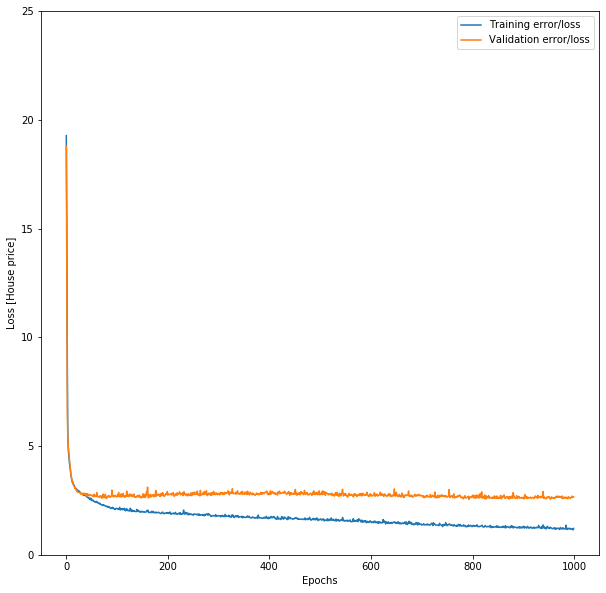

In [23]:
# History line plot of loss vs val_loss:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

plt.figure()
plt.legend(handles=[],loc="upper left")
plt.xlabel('Epochs')
plt.ylabel('Loss [House price]')
plt.plot(hist['epoch'], hist['loss'], label='Training error/loss')
plt.plot(hist['epoch'], hist['val_loss'], label = 'Validation error/loss')
plt.ylim([0,25])
plt.legend()
plt.show()

The line plot is very telling, showing rapid improvement in the validation until it levels off around 80 epochs and remains consistent. Let's now have a bit of fun and make some house price predictions using the training set data. Let's have a quick look at our mean squared error vs val_mean squared error too.

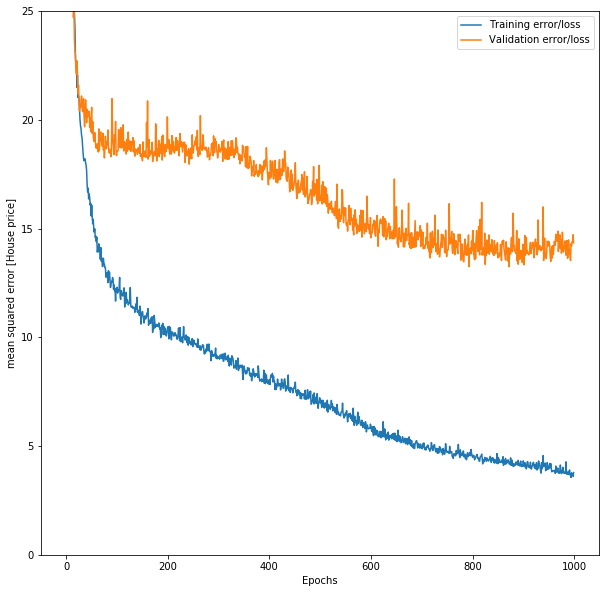

In [24]:
# History line plot of loss vs val_loss:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

plt.figure()
plt.legend(handles=[],loc="upper left")
plt.xlabel('Epochs')
plt.ylabel('mean squared error [House price]')
plt.plot(hist['epoch'], hist['mean_squared_error'], label='Training error/loss')
plt.plot(hist['epoch'], hist['val_mean_squared_error'], label = 'Validation error/loss')
plt.ylim([0,25])
plt.legend()
plt.show()

While we can see quite alot of oscillation, the mean squared error metric also came out relatively low at around 5 and consistently decreased. 

**Model prediction**

Now we can use our model to make predictions on "unknown" inputs. We can predict quantities with the finalized regression model by calling the predict() function on the finalized model. The predict() function takes an array of one or more data instances. The example below demonstrates how to make regression predictions on multiple data instances with an unknown expected outcome.

In [25]:
test_predictions = model.predict(normed_test_data).flatten()  # test input data
                    # model.predict(normed_test_data).round().T # The T attribute is the transpose of the array

# Flattening a tensor means to remove all of the dimensions except for one.
# A Flatten layer in Keras reshapes the tensor to have a shape that is equal to the number of elements contained in the tensor

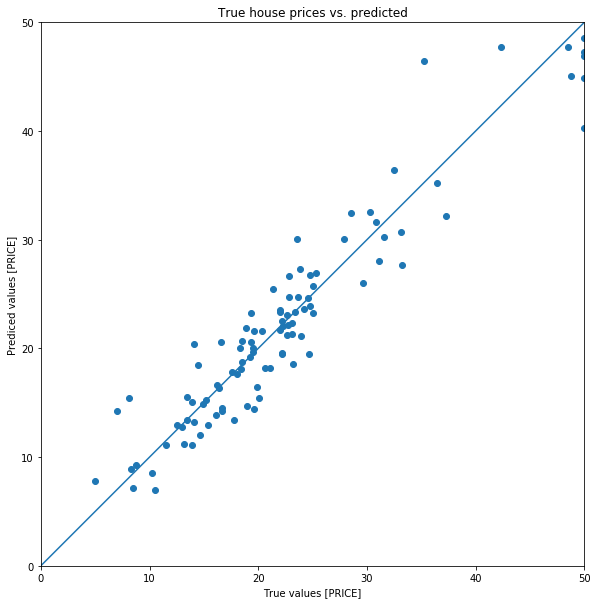

Slope = 0.9437672776633745
Intercept = 1.2508077851330839
R squared = 0.8894235170763944
r value = 0.9430925283748114
p value = 3.883700384670999e-49
Loss  = 1.4651983202239613
Mean squared error  = 5.834714


In [26]:
from scipy import stats

slope, intercept, r_value, p_value, slope_std_error = stats.linregress(test_labels,test_predictions)

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values [PRICE]')
plt.ylabel('Prediced values [PRICE]')
plt.rcParams['figure.figsize'] = (10, 10)
# Set x y limits:
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

# title
plt.title("True house prices vs. predicted")
plt.show()

print ("Slope = " + str(slope))
print ("Intercept = " + str(intercept))
print ("R squared = " + str(r_value**2))
print ("r value = " + str(r_value))
print ("p value = " +str(p_value))

print("Loss  = " + str(scores[0]))
print("Mean squared error  = " + str(scores[1]))

# Line of best-fit (red) [27]
# plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)),'r-') # poly1d returns a function for line of best fit

Our model looks like it predicts notable well. The R squared value is very high and the p value is highly significant. As previously mentioned, our loss function is very low ($1,450) and our extra metric or mean squared error is also quite low. Let's take a glance at the error distribution too.

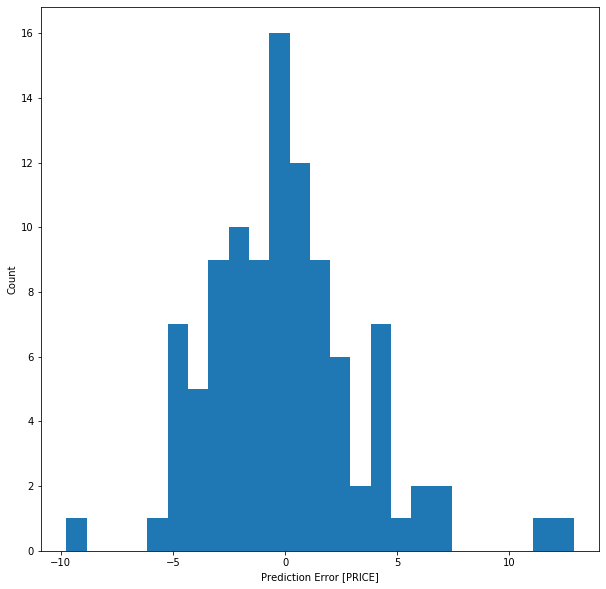

In [27]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [PRICE]")
_ = plt.ylabel("Count")

As errors typically occur, the plot looks relatively normal. Lastly, let's take a few of the predicted values and compare them to the actual values to check how close the values actually are. 

**Predict**

In [28]:
# Making a single prediction
#inference https://medium.com/@robertjohn_15390/simple-housing-price-prediction-using-neural-networks-with-tensorflow-8b486d3db3ca

prediction = model.predict(normed_test_data) # The same as test_predictions

print("Predicted house prices $\n", prediction[:10])
print("\n")
print("Actual house prices $\n", test_labels[:5])

Predicted house prices $
 [[21.895775]
 [15.104225]
 [18.089993]
 [18.509611]
 [11.174538]
 [19.511574]
 [31.664703]
 [26.969189]
 [20.61507 ]
 [23.361353]]


Actual house prices $
 9     18.9
25    13.9
28    18.4
31    14.5
32    13.2
Name: PRICE, dtype: float64


**Alternative method:**

In [29]:
predict = model.predict(normed_test_data).round().T # The T attribute is the transpose of the array

predict

array([[22., 15., 18., 19., 11., 20., 32., 27., 21., 23., 30., 24., 25.,
        24., 21., 23., 30., 23., 28., 20., 20., 19., 21., 22., 17., 18.,
        22., 12., 14., 49., 26., 21., 23., 25., 53., 36., 26., 35., 28.,
        47., 33., 48., 48., 23., 20., 25., 18., 27., 47., 45., 27., 45.,
        46., 31., 22., 22., 32., 32., 30., 27., 22., 21., 23., 19., 18.,
        19., 18., 13., 22., 21., 40., 11.,  9.,  9., 11., 13.,  8.,  7.,
        14., 13.,  9., 20.,  7., 13., 13., 13., 16., 14., 15., 16., 20.,
        25., 15., 16., 19., 15., 15., 14., 15., 15., 24.]], dtype=float32)

In [30]:
# Actual values:
test_labels.as_matrix().round() 

C:\Users\Gareth Duffy\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


array([19., 14., 18., 14., 13., 25., 31., 25., 17., 23., 32., 24., 23.,
       25., 24., 22., 24., 22., 33., 20., 18., 19., 19., 20., 16., 18.,
       20., 15., 20., 50., 25., 23., 23., 25., 40., 32., 30., 36., 31.,
       50., 30., 42., 48., 19., 22., 24., 18., 25., 50., 49., 23., 50.,
       35., 33., 22., 22., 28., 37., 28., 24., 23., 18., 25., 22., 21.,
       18., 21., 18., 23., 23., 50., 14.,  9., 10., 12., 12.,  5.,  8.,
       17., 13.,  8., 14., 10., 15., 14., 13., 13., 16., 15., 16., 20.,
       21., 19., 20., 23., 17., 15.,  7.,  8., 20., 22.])

In [31]:
# Cross reference predicted vs actual:

predict == test_labels.as_matrix()

C:\Users\Gareth Duffy\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


array([[False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False,  True, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
         True, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False,  True, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False]])

Looking at the predictions, we can see that very few are classed as "True". Why is this the case when our model scored very low loss values and high p value, R squared etc? 

Well, in reality this makes sense. House prices vary notably and are of floating point and continuous type. If we look again at the prediction vs actual PRICE scatterplot above, we can see that only around 4 or 5 of the values lie exaclty on the best fit line, and this is where the True cases are. In additon, if we were to do the same prediction test using a categorical variable as dependent variable, say 3 types of flower class, we would have a much higher count of True values. This is because that would be a classification predictor that is limited to only 3 possible outputs, whereas our predictor is of *regressor* type, which predicts the continuous variable price, and this could be almost any value you can think of. Furthermore, the predict method will declare a prediction as "True" **only** if that value is *exactly* the same as the actual value, hence why so few True values. The R squared value and p value are so high because it is very close to perfectly predicting the output variable but it is very difficult to predict it exactly. For example, the model might predict 19.45 on a against an actual value of 19 and be declared "False" because of the fact it is not identical down to the floating points. This is evidenced by looking at both output arrays above and comparing them, you will see that some predicted values which are 13 will be classed as false even of the actual value is 13.4. Indeed, if we didn't use the python "round" method we would have even less True values, I have experimented with this and confirm. 

So what can we do about this? One potential remedial method would be to put the price outputs into bins or "buckets", i.e."categorize" the continuous values, and the recheck our predict method to see if we get more values as True. But first let's plot both predicted and actual values to see just how close they really are. This will also let us decide what our bin ranges should be too.

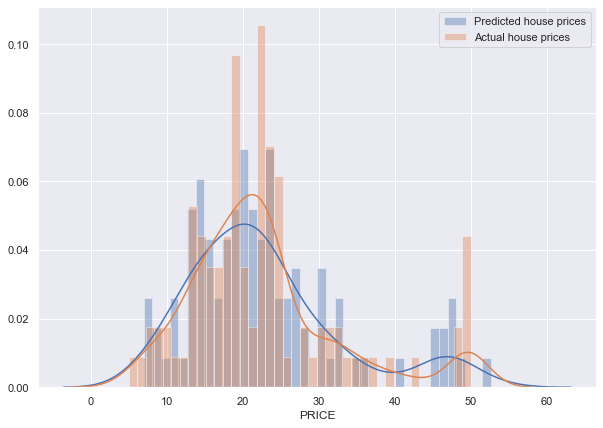

In [32]:
# Predicted vs Actual house prices (differenciated by colour):

sns.set(rc={'figure.figsize':(10,7)})
sns.distplot(test_predictions, bins=40, label='Predicted house prices')
sns.distplot(test_labels, bins=40, label='Actual house prices')
plt.legend()
plt.show()

As we believed, the predicted vs actual prices ARE very closely matched and further confirms our model is pretty good at predicting. Let's bucket the prices and retest our predictions. We know our highest house price doesn't exceed $60,000 so we can stop our buckets there. Let's check the min and max values just in case.

In [33]:
print(test_labels.min())
print(test_labels.max())
print(test_predictions.min())
print(test_predictions.max())

5.0
50.0
6.9901323
52.66601


And there it is, we now know we have no values less than 5 and none greater than 52, it's time to bucket the price values.

In [34]:
# https://dfrieds.com/data-analysis/bin-values-python-pandas
# Let's bucketize our test_labels first i.e. the actual house prices: 

# Set up 12 bins
bins = [0,5,10,15,20,25,30,35,40,45,50,55]
# Use pd.cut function can attribute the values into its specific bins

bucketize = pd.cut(test_labels,bins,labels=['0-4','5-9','10-14','15-19','20-24','25-29','30-34','35-39','40-44','45-50','51-55'])
df_test_labels = pd.DataFrame(bucketize)
df_test_labels.as_matrix()

C:\Users\Gareth Duffy\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.


array([['15-19'],
       ['10-14'],
       ['15-19'],
       ['10-14'],
       ['10-14'],
       ['20-24'],
       ['30-34'],
       ['25-29'],
       ['15-19'],
       ['20-24'],
       ['30-34'],
       ['20-24'],
       ['20-24'],
       ['20-24'],
       ['20-24'],
       ['20-24'],
       ['20-24'],
       ['20-24'],
       ['30-34'],
       ['15-19'],
       ['15-19'],
       ['15-19'],
       ['15-19'],
       ['20-24'],
       ['15-19'],
       ['15-19'],
       ['15-19'],
       ['10-14'],
       ['15-19'],
       ['45-50'],
       ['20-24'],
       ['20-24'],
       ['20-24'],
       ['20-24'],
       ['35-39'],
       ['30-34'],
       ['25-29'],
       ['35-39'],
       ['30-34'],
       ['45-50'],
       ['30-34'],
       ['40-44'],
       ['45-50'],
       ['15-19'],
       ['20-24'],
       ['20-24'],
       ['15-19'],
       ['20-24'],
       ['45-50'],
       ['45-50'],
       ['20-24'],
       ['45-50'],
       ['35-39'],
       ['30-34'],
       ['20-24'],
       ['2

Great, the actual prices have been converted to categories, now we'll bucketize the predicted prices but first convert the predict type to a pandas series.

In [35]:
type(test_labels) # series type
type(test_predictions) # array type

# Convert the numpy array predict into a series:
#predict.tolist()
#predict_new = pd.Series(predict.tolist())
#type(predict_new) # now check type

numpy.ndarray

In [105]:
#predict = pd.DataFrame(predict_new)
#predict

In [36]:
# Now we bucketize our predictions : TODO

# Set up 12 bins
bins = [0,5,10,15,20,25,30,35,40,45,50,55]
# Use pd.cut function can attribute the values into its specific bins

bucketize = pd.cut(test_predictions,bins,labels=['0-4','5-9','10-14','15-19','20-24','25-29','30-34','35-39','40-44','45-50','51-55'])
df_test_predictions = pd.DataFrame(bucketize)
df_test_predictions.as_matrix()

C:\Users\Gareth Duffy\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':


array([['20-24'],
       ['15-19'],
       ['15-19'],
       ['15-19'],
       ['10-14'],
       ['15-19'],
       ['30-34'],
       ['25-29'],
       ['20-24'],
       ['20-24'],
       ['30-34'],
       ['20-24'],
       ['20-24'],
       ['20-24'],
       ['20-24'],
       ['20-24'],
       ['30-34'],
       ['20-24'],
       ['25-29'],
       ['15-19'],
       ['20-24'],
       ['15-19'],
       ['20-24'],
       ['20-24'],
       ['15-19'],
       ['15-19'],
       ['20-24'],
       ['10-14'],
       ['10-14'],
       ['45-50'],
       ['25-29'],
       ['20-24'],
       ['20-24'],
       ['20-24'],
       ['51-55'],
       ['35-39'],
       ['25-29'],
       ['35-39'],
       ['25-29'],
       ['45-50'],
       ['30-34'],
       ['45-50'],
       ['45-50'],
       ['20-24'],
       ['15-19'],
       ['20-24'],
       ['15-19'],
       ['25-29'],
       ['45-50'],
       ['45-50'],
       ['25-29'],
       ['40-44'],
       ['45-50'],
       ['30-34'],
       ['20-24'],
       ['2

Great, so now we have both our continuous predicted vs actual house price data converted to categorical bins with a threshold of +/- $4000 per bin. Now let's retest for our True vs False matches to see how well the model predicts this time. 

In [37]:
confirm_predictions = df_test_labels.as_matrix() == df_test_predictions.as_matrix()
confirm_predictions

C:\Users\Gareth Duffy\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([[False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [

This looks alot better, let's do a count to confirm how many were predicted correctly.

In [38]:
print("Prices correctly predicted: ",sum(confirm_predictions == True)) # Check predicted
print("Prices incorrectly predicted: ",sum(confirm_predictions == False)) # Check wrong

Prices correctly predicted:  [53]
Prices incorrectly predicted:  [48]


While not that admirable, it is an improvement on the non-bucketized method.

***
### Additional exploratory analyses
***

Our neural network produced some pretty interesting results, but what about if we wanted to enter a completely new array of input variables from a new house to predict its price? Well, for tht we can us an scikit learn tree regressor (as opposed to a classifier which is only used when the dependent variable is of categorical type). This is a regression based study after all.

In [109]:
from sklearn import tree
reg = tree.DecisionTreeRegressor()

X = bostonSelect[['RM','LSTAT','PTRATIO','TAX','NOX','INDUS','CRIM',]]
Y = bostonSelect['PRICE']

reg = reg.fit(X,Y) # Fitting the model

# Now we can test out a random row example, to see if the tree predicts correctly

X.loc[22].round(2)

RM           6.00
LSTAT       18.72
PTRATIO     21.00
TAX        307.00
NOX          0.54
INDUS        8.14
CRIM         1.23
Name: 22, dtype: float64

In [110]:
# Now get the price for that row:
Y.loc[22]

15.2

Now, let's test these outputs to see if correctly predicts price.

In [32]:
# reg.predict receives sets of inputs to predict an output:

reg.predict([[6, 18.72, 21,307,0.54,8.14,1.23]]) # Checking the example with our tree predictor

array([15.2])

So our predictor is absolutely correct: $15,200 house price. Let's now fee in an array of new data and see what price it will predict on that.



In [33]:
# Making a prediction based on new house data:

new_prediction = reg.predict([[4, 16, 15, 290, 0.3,5,1.01]])  # Inputting novel house data values for prediction                               
new_prediction

array([19.8])

So based on us inputting all the values for a new house it has predicted a price of $19,800.

*** 
### Evaluation & discussion
***
**General findings**

Exploring and unearthing some of the Boston datasets qualities and properties was pretty interesting.Let's reflect upon some of the most interesting observations.

Low economic status (LSTAT) appeared to have a very high negative correlation with price. This may suggest that a notably large percentage of individuals of poor socio economic status reside in houses which are of lower value. For a higher LSTAT, we would normally expect to see lower house prices. It may be that in an area dominated by "lower class" individuals would possibly lower the actual demand or desire to live there. This could be for reasons such as safety, unmaintained or neglected surroundings and so on, thus driving prices down. Another interesting observation is that there is a strong negative relationship between pupil-teacher ration and house prices. It may be the case that where there is a higher pupil to teacher ratio (too many pupils per teacher) there may also be more public schools where house prices are by association, usually also lower. Compare this to areas where houses are more expensive, these areas often have private schools which typically have a lower pupil to teacher ratio. It seems the take home here is that the less teachers there are per pupil, the less people pay on median for their home.  

Air quality also appeared to have a gentle influence on house prices, displaying a moderate correlation. Why?
The main aim of the authors of the original study to determine whether pollution had an influence on housing prices, it should be considered very carefully whether can serve as an explanatory variable for the price. A possible reason against it being an explanatory variable is that people might not like to live in areas where the emissions of nitric oxides are high. Nitric oxides are emitted mainly by cars and vans etc, by factories and from heating private homes. However, as one can imagine there are many good reasons besides nitric oxides not to live downtown or in industrial areas. Noise pollution, for example, might offer a better explanatory variable for the price of housing units. As the emission of nitric oxides is usually accompanied by noise pollution, using  as an explanatory variable for  might lead to the false conclusion that people run away from nitric oxides, whereas in reality it is noise pollution that they are trying to escape. It is also a little unsettling that lower income residents have higher levels of oxides surrounding them. In addition there is a notable positive correlation between LSTAT and measures of NOX, which may allude to cheaper houses being situated nearer industrialised areas or areas with more build up of traffic or noise.

Now to reflect on the main variable house price. We saw that prices are higher in areas with lower crime and lower pupil-teacher ratios. This makes intuitive sense. There are also far less houses in the beside the river than away from it. However, the Charles River apparently does not flow through too many different districts. Thus, it may be mere coincidence that the more expensive districts are close to the Charles river. Indeed, their high values might be caused by many other factors such as the pupil/teacher ratio or the proportion of non-retail business acres. House prices also tend to be higher closer to the river. Houses with more rooms were also found to be typically more expensive. This is pretty intuitive, more rooms suggest more living space, hence costing more. A very strong correlation between property tax and access to radial highways was also revealed. Indeed, it seems that the more accessibilty there is for certain dwellings, the more property tax they will pay. Compare this observation with a similar scenario in Dublin today where houses located near luas stops are typically more desirbale and thus valued notably higher. To recap, whether or not a house is by the river, the number of rooms per house and distance to accessing radial highways appear to the most notable influences on house prices in Boston.


**Model applicability and generalisability**

The implemented model seemed to be quite good. Neverthless, it was built with a large degree of guesswork and on a relatively small sample. A small sample, in this case 506 is not appropriate for making broader generalisations on the population of interest. Furthermore, the Boston housing study was conducted back in 1978. Data collected from this era really doesn't offer much value or applicability in today’s society. Society and economics have changed so much and inflation has made a great impact on house prices. In addition, while the feature variables were interesting, with a handful displaying some weight on house prices, they nonetheless offered a meagre explanation of house prices. The data is only really as useful as what its variables measure, which in this case was clearly limited. There are many other worthy features that would have much heavier weighting on price, such as the square meterage of the house, the house energy rating, whether the house is air-tight and well insulated, general condition as well as many other properties that are relevant and pertain direclty to house prices. Even if these factors weren't a problem, the model is still not robust enough or even appropriate to make reliable predictions anyway. Consider for example the high variance on house price range, and the weak sample of 35 versus 470 houses which bound or don't bound the river. This sample would not at all be representative of other housing areas. Moreover, data collected from a large urban city like Boston would generally not be applicable in a rural city, and it makes no intuitive sense to estimate or predict the price of an individual home based on the features of an entire neighbourhood, as was the case with the original study. Indeed there is often a huge difference in house price across the same neighbourhood.

Lastly, what was conducted from this small study compared to the original study was vastly different in almost every way. For example, the original paper investigated the methodological problems associated with the use of housing market data to measure the willingness to pay for clean air. i.e. Expressing the benefits of reduced urban air pollution concentrations in monetary terms. By contrast, we explored none of those factors but instead built a model based on predicting house prices from a few low-count sample features and not from variables relevant to the presumption that individuals will pay more for a unit located in an area with good air quality. What I am saying is that the variables they used were not at all used to predict house price anwyay but instead to explore willingness to pay for air quality and so it is difficult to relate our work back to theirs. The researchers also claimed that their data base was superior to others (researchers) because it contained a large number of neighborhood variables (necessary to isolate the independent influence of air pollution), and their results still did not corroborate these claims. That said the paper was a notably intriguing one to explore and much was learned from its accompanying data for the present purpose.

***

***
### References
***

[1]. Scikit-learn developers (2019). *sklearn.datasets.load_boston*. Retrieved 29/09/19 from: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html

[2]. Multiple authors (2018). *The Boston Housing Dataset*. Retrieved 30/09/19 from: https://www.kaggle.com/prasadperera/the-boston-housing-dataset

[3]. Gupta, A. (2019). *Sklearn Linear Regression Tutorial with Boston House Dataset*. Retrieved 30/09/19 from: https://medium.c*.om/@amitg0161/sklearn-linear-regression-tutorial-with-boston-house-dataset-cde74afd460a

[4]. DELVE (1996).*The Boston Housing Dataset*. Retrieved 01/10/19 from: https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html

[5]. Harrison, D. & Rubinfeld, D.L. (1978). "Hedonic prices and the demand for clean air", *J. Environ. Economics & Management,* vol.5, 81-102

[6]. SciPy developers. (2015). *scipy.stats.median_test*.Retrieved 04/10/19 from: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.median_test.html

[7]. Unknown author. (2019) *Seaborn Drawing Getting Started Practice*. Retrieved 07/10/19 from:http://www.programmersought.com/article/312818921/

[8]. Waskom, M. (2018). *seaborn.kdeplot*. Retrieved 07/10/19 from: https://seaborn.pydata.org/generated/seaborn.kdeplot.html

[9]. Python Documentation. (2019). *Numeric and Mathematical Modules*. Retrieved 07/10/19 from https://docs.python.org/2/library/math.html

[10]. Mutiple authors. (2019). *Bivariate data*. Retrieved 07/10/19 from: https://en.wikipedia.org/wiki/Bivariate_data

[11]. Roman, V. (2019). *Machine Learning Project: Predicting Boston House Prices With Regression*. Retrieved 07/10/19 from https://towardsdatascience.com/machine-learning-project-predicting-boston-house-prices-with-regression-b4e47493633d

[12]. SciPy developers. (2015). *scipy.stats.kruskal*.Retrieved 04/10/19 from:https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kruskal.html#scipy.stats.kruskal

[13]. Brownlee, J. (2018). *Nonparametric statistical significance tests in python*. Retrieved 04/10/19 from:https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/

[14]. Duffy, G. (2018). *Boxplots: An investigation into the history, utility, and relevance of the plot*. Retrieved 08/10/19 from: https://github.com/Datagatherer2357/Project-Fundamentals-of-data-analysis-GMIT

[15]. Multiple authors. (2019). *Median test*. Retrieved 08/10/19 from: https://en.wikipedia.org/wiki/Median_test

[16]. Duchesnay, E. & Löfstedt, T. (2019). Statistics and Machine Learning in Python. 

[17]. Chubarov, D. (2017). *Stackoverflow: how to use Numpy.polyfit to plot trend*. Retrieved 22/10/19 from: https://stackoverflow.com/questions/46627629/how-to-use-numpy-polyfit-to-plot-trend

[18]. Masri, A. (2019). *Regression with Keras.* Retrieved 14/11/19 from: https://www.marktechpost.com/2019/06/17/regression-with-keras-deep-learning-with-keras-part-3/

[19]. Author unknown (2017). *Stackoverflow: Adding line to scatter plot using python's matplotlib*. Retrieved 22/10/19 from: https://stackoverflow.com/questions/40516661/adding-line-to-scatter-plot-using-pythons-matplotlib

[20]. Author unknown (2019). *Python for data science: Independent T-test*. Retrieved 20/10/19 from: https://pythonfordatascience.org/independent-t-test-python/ 

[21]. Author unknown (2019). *The median outclasses the mean*. Retrieved 16/10/19 from: https://creativemaths.net/blog/median/

[22]. Brownlee, J. (2018). *A Gentle Introduction to Normality Tests in Python*. Retrieved 16/11/19 from: https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/

[23]. Multiple authors, (2019). *Keras: The Python Deep Learning library*. Retrieved 18/11/19 from: https://keras.io

[24]. Gheorghiu, T. (2018).*ANN Visualizer: Layer not supported for visualizing*. Retrieved 18/11/19 from:  https://github.com/Prodicode/ann-visualizer/issues/5

[25]. Lima, J.G. (2018). *Visualizing the architecture of your own model of Artificial Neural Networks*. Retrieved 19/11/19 from:https://medium.com/@joaogabriellima/visualizing-the-architecture-of-your-own-model-of-artificial-neural-networks-7f0ea6b2a86d

[26]. Mutliple authors, (2019). Tensorflow.org: *Basic regression*. Retrieved 20/11/19 from:   https://www.tensorflow.org/tutorials/keras/regression

[27]. Author unknown, (2019). *Code for best fit straight line of a scatter plot in python*. Retrievd 20/11/19 from: https://stackoverflow.com/questions/22239691/code-for-best-fit-straight-line-of-a-scatter-plot-in-python

[28]. Graf, B. (2018). StackOverflow:*What function defines accuracy in Keras when the loss is mean squared error (MSE)?*. Retrieved 21/11/19 from: https://stackoverflow.com/questions/48775305/what-function-defines-accuracy-in-keras-when-the-loss-is-mean-squared-error-mse?rq=.1

[29]. Rosebrock, A. (2019). PyImageSearch: *Why is my validation loss lower than my training loss?*. Retrieved 22/11/19 from: https://www.pyimagesearch.com/2019/10/14/why-is-my-validation-loss-lower-than-my-training-loss/

[30]. Author unknown, (2019). *Dataquest: understanding-regression-error-metrics*. Retrieved 24/11/19 from:https://www.dataquest.io/blog/understanding-regression-error-metrics/

[31]. Brownlee, J. (2019). *How-to-choose-loss-functions-when-training-deep-learning-neural-networks*. Retrieved 24/11/19 from:https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/

[32]. Waskom, M. (2018), Seaborn Documentation:*seaborn.heatmap*. Retrieved 24/11/19 from:https://seaborn.pydata.org/generated/seaborn.heatmap.html

[33]. Merchant, A. (2018). *Neural Networks Explained*. Retreived 28/11/19 from: https://medium.com/datadriveninvestor/neural-networks-explained-6e21c70d7818

[34]. Sambvanu, A. (2018). *Neural Network Glossry*. Retrieved 28/11/19 from: https://medium.com/@alex.sambvani/neural-network-glossary-72e4f63d34db

[35]. A. Ankita. (2018). *DATA ANALYSIS IN PYTHON USING THE BOSTON HOUSING DATASET*.Retrieved 8/12/19 from: http://prisoft.com/data-analysis-in-python-using-the-boston-housing-dataset/